In [265]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [267]:
data = pd.read_csv("phishing.csv")
# data = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv",nrows=100)
# Separate the data into two classes based on the 'label'
class_0 = data[data['Label'] == 0].head(10000)
class_1 = data[data['Label'] == 1].head(10000)

# Concatenate the sampled dataframes
balanced_data = pd.concat([class_0, class_1])

# Shuffle the data
data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,nounouri.firebaseapp.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,mail-security-check8877856556.web.app,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,kafkasariotel.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,mymobileapp-home.firebaseapp.com,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,pub-0028a710fce54eb0a4d073f65c51e919.r2.dev,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [268]:
data1.shape

NameError: name 'data1' is not defined

In [269]:
# Familiarizing with Data & EDA:
#Shape of dataframe

data.shape

(10000, 18)

<!-- Listing the features of the dataset -->

In [270]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [272]:
# nunique value in columns

data.nunique()

Domain           6616
Have_IP             1
Have_At             2
URL_Length          2
URL_Depth          12
Redirection         2
https_Domain        2
TinyURL             2
Prefix/Suffix       2
DNS_Record          1
Web_Traffic         1
Domain_Age          1
Domain_End          1
iFrame              1
Mouse_Over          1
Right_Click         1
Web_Forwards        1
Label               1
dtype: int64

In [273]:
#droping index column

data = data.drop(['Domain'],axis = 1)

In [274]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
Have_At,10000.0,0.0114,0.106166,0.0,0.0,0.0,0.0,1.0
URL_Length,10000.0,0.4356,0.495860,0.0,0.0,0.0,1.0,1.0
URL_Depth,10000.0,1.1895,1.524474,0.0,0.0,1.0,2.0,22.0
Redirection,10000.0,0.0124,0.110668,0.0,0.0,0.0,0.0,1.0
https_Domain,10000.0,0.0008,0.028274,0.0,0.0,0.0,0.0,1.0
TinyURL,10000.0,0.0417,0.199913,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,10000.0,0.4123,0.492273,0.0,0.0,0.0,1.0,1.0
DNS_Record,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
Web_Traffic,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


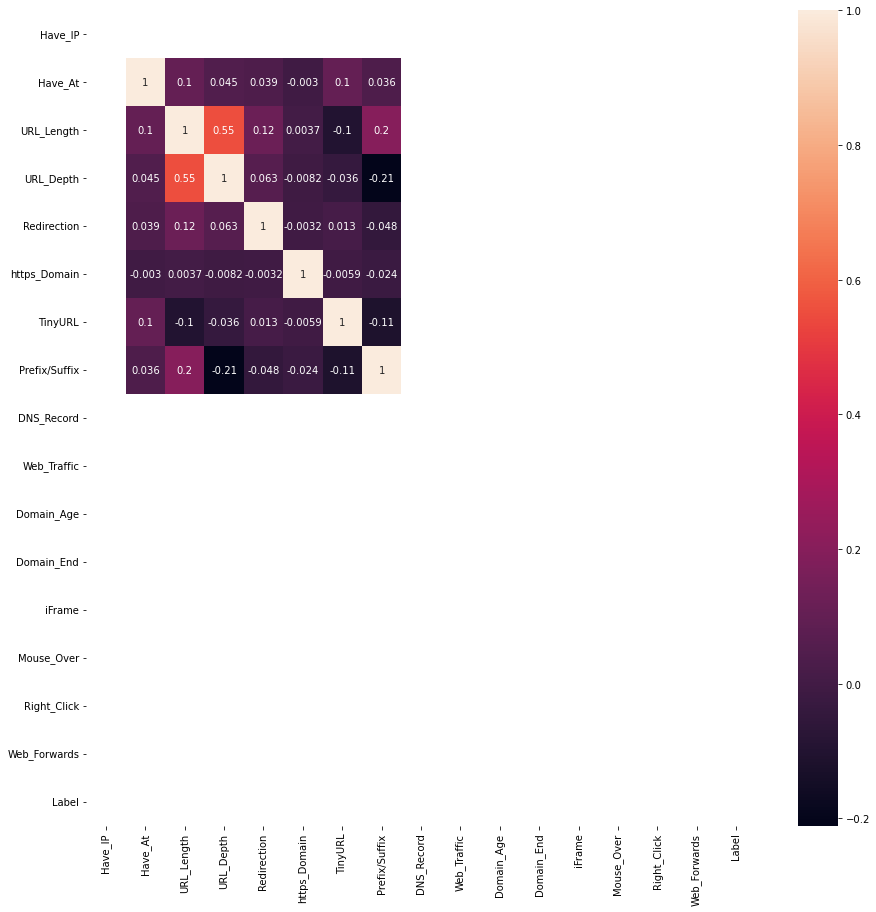

In [275]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [276]:
print(data.columns)


Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')


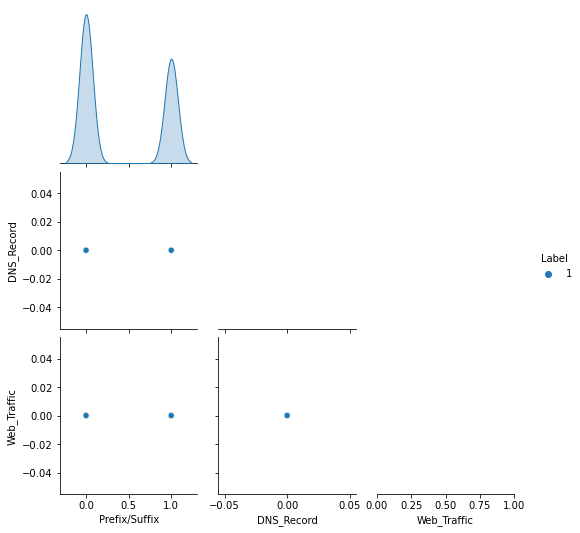

In [277]:
#pairplot for particular features

#df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
#sns.pairplot(data = df,hue="class",corner=True);

# Select relevant columns
df = data[['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label']]

# Plot pairplot
sns.pairplot(data=df, hue="Label", corner=True);





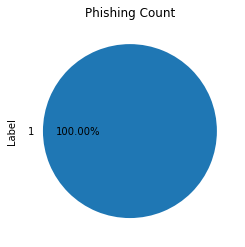

In [278]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [40]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.countplot(x='Have_IP', data=data)
# plt.title('Distribution of Have_IP')
# plt.xlabel('Have_IP')
# plt.ylabel('Count')
# plt.show()


In [41]:
# # Plot count plot for 'Have_At' attribute
# plt.figure(figsize=(10, 6))
# sns.countplot(x='Have_At', data=data, palette='Set2')
# plt.xlabel('Have_At')
# plt.ylabel('Count')
# plt.title('Count of URLs with and without "@" symbol in Dataset')
# plt.show()


In [42]:
# # Plot histogram for 'URL_Depth' attribute
# plt.figure(figsize=(10, 6))
# plt.hist(data['URL_Depth'], bins=15, color='lightgreen', edgecolor='black')
# plt.xlabel('URL Depth')
# plt.ylabel('Frequency')
# plt.title('Histogram of URL Depth')
# plt.show()


In [43]:
# # Plot histogram for 'Domain_Age' attribute
# plt.figure(figsize=(10, 6))
# plt.hist(data['Domain_Age'], bins=20, color='salmon', edgecolor='black')
# plt.xlabel('Domain Age')
# plt.ylabel('Frequency')
# plt.title('Histogram of Domain Age')
# plt.show()


In [44]:
# # Plot histogram for 'Web_Traffic' attribute
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Web_Traffic'], bins=20, kde=True, color='salmon')
# plt.xlabel('Web Traffic')
# plt.ylabel('Frequency')
# plt.title('Histogram of Web Traffic in Dataset')
# plt.show()


In [45]:
# # Plot pie chart for 'Redirection' attribute
# plt.figure(figsize=(8, 8))
# data['Redirection'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
# plt.title('Redirection Distribution')
# plt.ylabel('')
# plt.show()


In [46]:
# # Plot pie chart for 'https_Domain' attribute
# plt.figure(figsize=(8, 8))
# data['https_Domain'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
# plt.title('HTTPS Domain Distribution')
# plt.ylabel('')
# plt.show()


In [47]:
# # Plot pie chart for 'iFrame' attribute
# plt.figure(figsize=(8, 8))
# data['iFrame'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'lightgrey'])
# plt.title('iFrame Distribution')
# plt.ylabel('')
# plt.show()



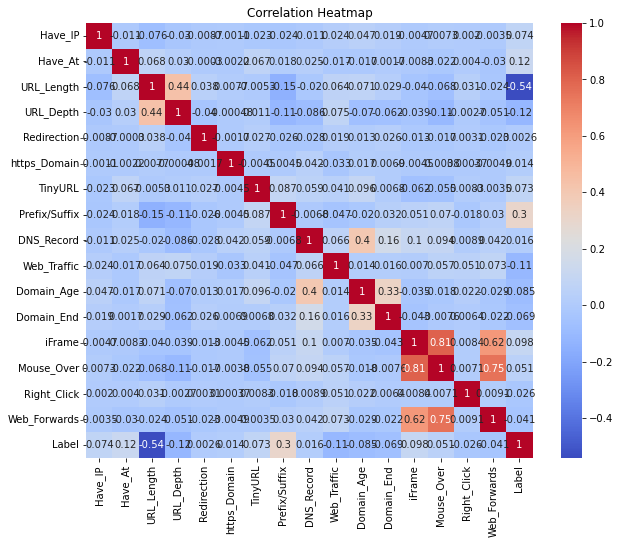

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



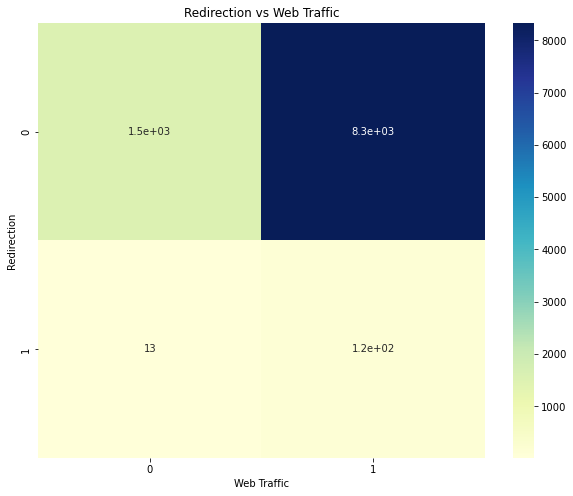

In [49]:
# Plot heatmap for Redirection vs Web Traffic
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(data['Redirection'], data['Web_Traffic']), annot=True, cmap='YlGnBu')
plt.title('Redirection vs Web Traffic')
plt.xlabel('Web Traffic')
plt.ylabel('Redirection')
plt.show()


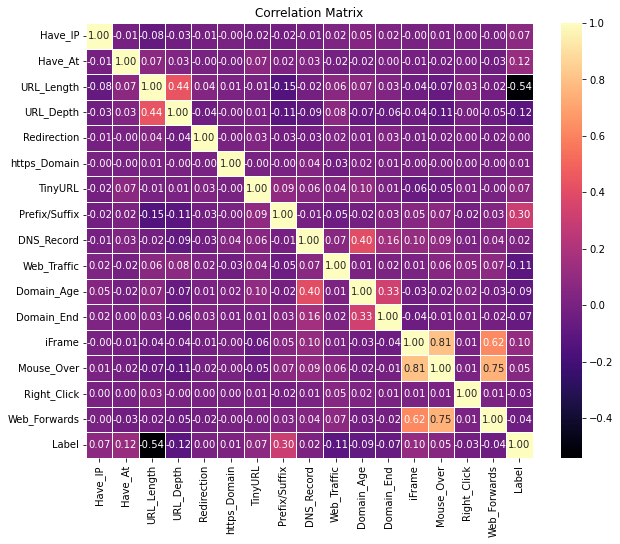

In [50]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)  # Change 'magma' to any other colormap you prefer
plt.title('Correlation Matrix')
plt.show()


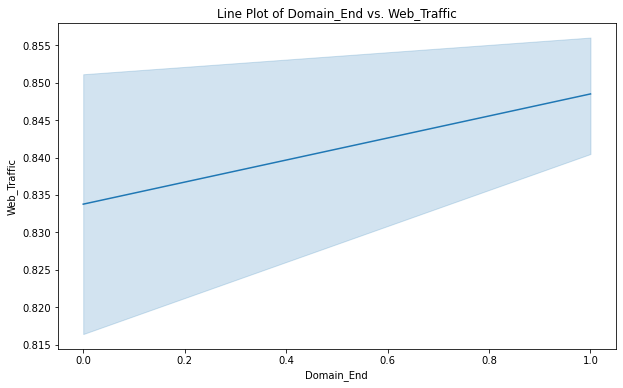

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Domain_End', y='Web_Traffic', data=data)
plt.title('Line Plot of Domain_End vs. Web_Traffic')
plt.xlabel('Domain_End')
plt.ylabel('Web_Traffic')
plt.show()


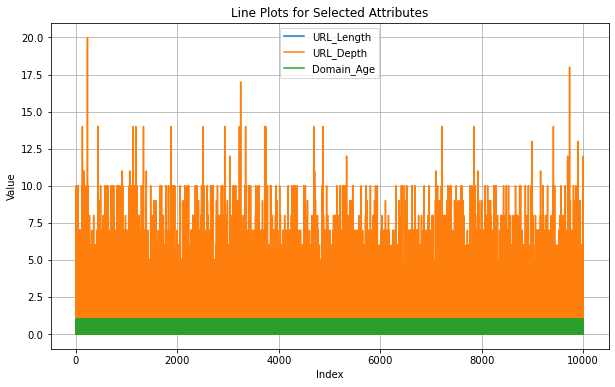

In [52]:
import matplotlib.pyplot as plt

# Define attributes for line plots
attributes = ['URL_Length', 'URL_Depth', 'Domain_Age']

# Plot line plots for each attribute
plt.figure(figsize=(10, 6))
for attribute in attributes:
    plt.plot(data[attribute], label=attribute)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plots for Selected Attributes')
plt.legend()
plt.grid(True)
plt.show()


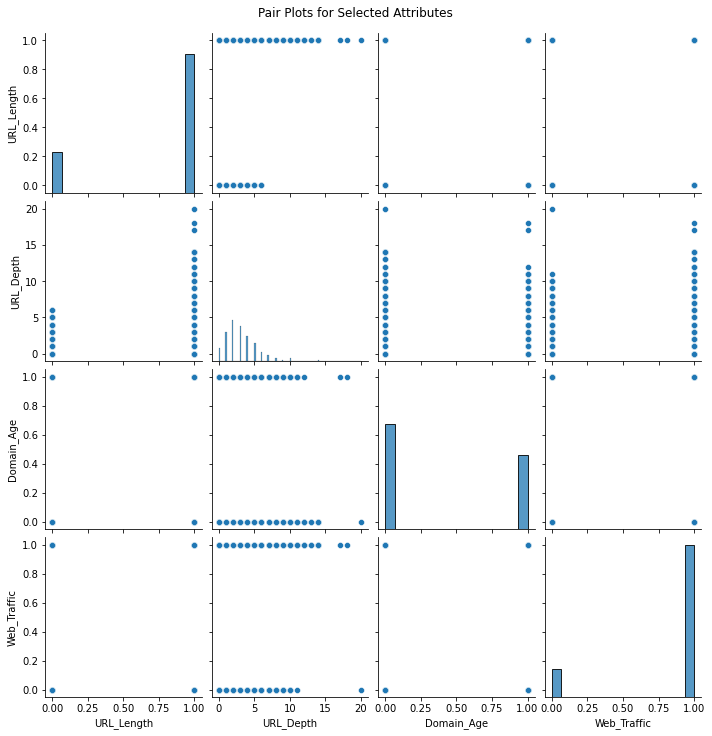

In [53]:
import seaborn as sns

# Select attributes for pair plots
attributes = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']

# Create pair plots
sns.pairplot(data[attributes])
plt.suptitle('Pair Plots for Selected Attributes', y=1.02)
plt.show()


In [12]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [13]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 16), (8000,), (2000, 16), (2000,))

In [183]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [184]:
# LogisticRegression regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [185]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [186]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.798
Logistic Regression : Accuracy on test Data: 0.810

Logistic Regression : f1_score on training Data: 0.763
Logistic Regression : f1_score on test Data: 0.774

Logistic Regression : Recall on training Data: 0.649
Logistic Regression : Recall on test Data: 0.657

Logistic Regression : precision on training Data: 0.925
Logistic Regression : precision on test Data: 0.942


In [187]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1013
           1       0.94      0.66      0.77       987

    accuracy                           0.81      2000
   macro avg       0.84      0.81      0.81      2000
weighted avg       0.84      0.81      0.81      2000



In [188]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

<AxesSubplot:>

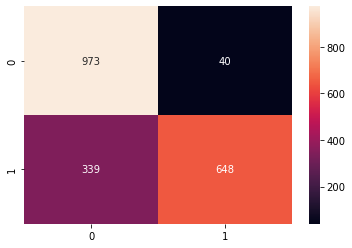

In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_log)
sns.heatmap(confusion_matrix(y_test, y_test_log), annot = True, fmt='0.0f')

In [190]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [191]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [192]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.811
K-Nearest Neighbors : Accuracy on test Data: 0.801

K-Nearest Neighbors : f1_score on training Data: 0.806
K-Nearest Neighbors : f1_score on test Data: 0.792

K-Nearest Neighborsn : Recall on training Data: 0.783
Logistic Regression : Recall on test Data: 0.769

K-Nearest Neighbors : precision on training Data: 0.830
K-Nearest Neighbors : precision on test Data: 0.817


In [193]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1013
           1       0.82      0.77      0.79       987

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



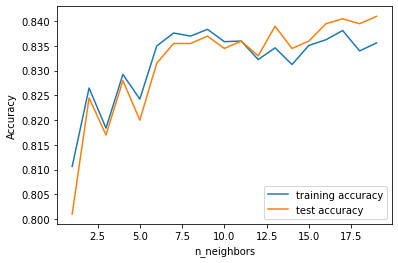

In [194]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [195]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

<AxesSubplot:>

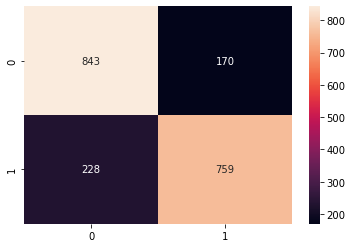

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn)
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt='0.0f')

In [197]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [198]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [199]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.826
Support Vector Machine : Accuracy on test Data: 0.837

Support Vector Machine : f1_score on training Data: 0.798
Support Vector Machine : f1_score on test Data: 0.809

Support Vector Machine : Recall on training Data: 0.685
Support Vector Machine : Recall on test Data: 0.698

Support Vector Machine : precision on training Data: 0.956
Support Vector Machine : precision on test Data: 0.961


In [200]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1013
           1       0.96      0.70      0.81       987

    accuracy                           0.84      2000
   macro avg       0.86      0.84      0.83      2000
weighted avg       0.86      0.84      0.83      2000



<AxesSubplot:>

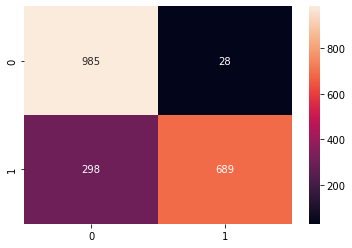

In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [202]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [203]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [204]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [205]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.787
Naive Bayes Classifier : Accuracy on test Data: 0.801

Naive Bayes Classifier : f1_score on training Data: 0.734
Naive Bayes Classifier : f1_score on test Data: 0.750

Naive Bayes Classifier : Recall on training Data: 0.586
Naive Bayes Classifier : Recall on test Data: 0.604

Naive Bayes Classifier : precision on training Data: 0.981
Naive Bayes Classifier : precision on test Data: 0.990


In [206]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84      1013
           1       0.99      0.60      0.75       987

    accuracy                           0.80      2000
   macro avg       0.86      0.80      0.79      2000
weighted avg       0.85      0.80      0.79      2000



<AxesSubplot:>

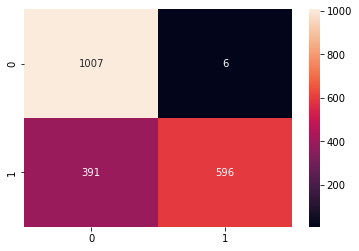

In [207]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_nb), annot = True, fmt='0.0f')

In [208]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [209]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [210]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [211]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.856
Decision Tree : Accuracy on test Data: 0.862

Decision Tree : f1_score on training Data: 0.843
Decision Tree : f1_score on test Data: 0.848

Decision Tree : Recall on training Data: 0.771
Decision Tree : Recall on test Data: 0.779

Decision Tree : precision on training Data: 0.929
Decision Tree : precision on test Data: 0.930


In [212]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1013
           1       0.93      0.78      0.85       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



<AxesSubplot:>

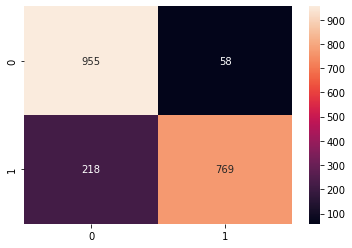

In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_tree)
sns.heatmap(confusion_matrix(y_test, y_test_tree), annot = True, fmt='0.0f')

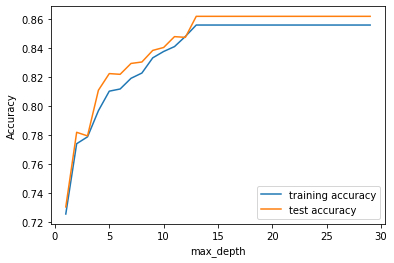

In [214]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [215]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

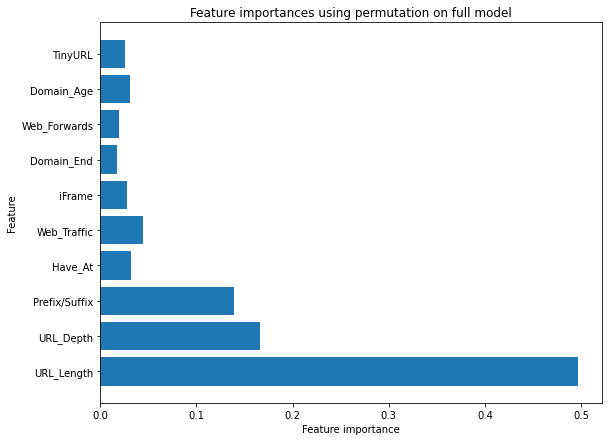

In [216]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [217]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [218]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [219]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.856
Random Forest : Accuracy on test Data: 0.865

Random Forest : f1_score on training Data: 0.844
Random Forest : f1_score on test Data: 0.852

Random Forest : Recall on training Data: 0.776
Random Forest : Recall on test Data: 0.789

Random Forest : precision on training Data: 0.924
Random Forest : precision on test Data: 0.930


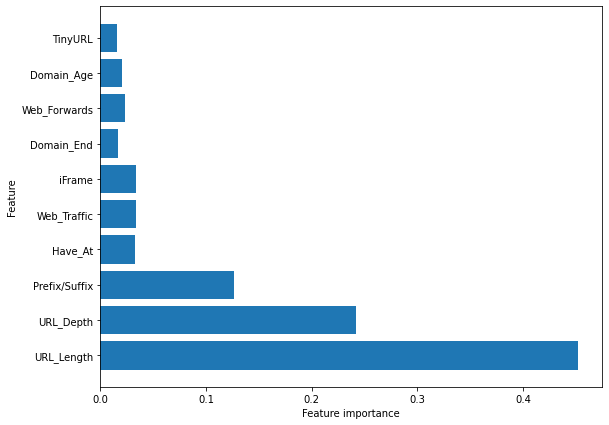

In [220]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [221]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1013
           1       0.93      0.79      0.85       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



<AxesSubplot:>

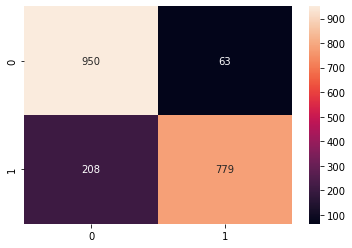

In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_forest)
sns.heatmap(confusion_matrix(y_test, y_test_forest), annot = True, fmt='0.0f')

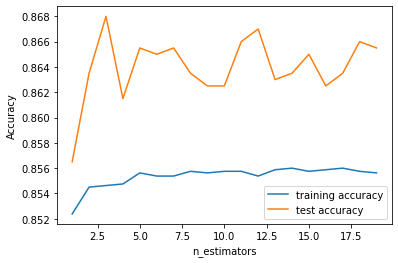

In [223]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [224]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [225]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [226]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [227]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.856
Gradient Boosting Classifier : Accuracy on test Data: 0.863

Gradient Boosting Classifier : f1_score on training Data: 0.844
Gradient Boosting Classifier : f1_score on test Data: 0.850

Gradient Boosting Classifier : Recall on training Data: 0.775
Gradient Boosting Classifier : Recall on test Data: 0.784

Gradient Boosting Classifier : precision on training Data: 0.926
Gradient Boosting Classifier : precision on test Data: 0.927


In [228]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1013
           1       0.93      0.78      0.85       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



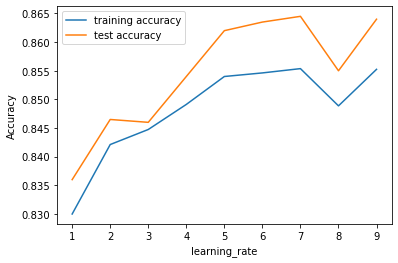

In [229]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

<AxesSubplot:>

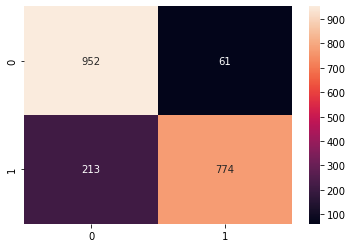

In [230]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_gbc)
sns.heatmap(confusion_matrix(y_test, y_test_gbc), annot = True, fmt='0.0f')

In [231]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [232]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5988018	total: 10.8ms	remaining: 10.8s
1:	learn: 0.5410292	total: 25.2ms	remaining: 12.6s
2:	learn: 0.5024698	total: 36.5ms	remaining: 12.1s
3:	learn: 0.4746441	total: 48.8ms	remaining: 12.1s
4:	learn: 0.4561149	total: 60.9ms	remaining: 12.1s
5:	learn: 0.4420967	total: 73.5ms	remaining: 12.2s
6:	learn: 0.4322900	total: 85.4ms	remaining: 12.1s
7:	learn: 0.4265857	total: 95.1ms	remaining: 11.8s
8:	learn: 0.4215914	total: 107ms	remaining: 11.8s
9:	learn: 0.4141029	total: 119ms	remaining: 11.8s
10:	learn: 0.4126328	total: 127ms	remaining: 11.4s
11:	learn: 0.4081306	total: 139ms	remaining: 11.4s
12:	learn: 0.4071230	total: 148ms	remaining: 11.2s
13:	learn: 0.4029372	total: 160ms	remaining: 11.3s
14:	learn: 0.3981877	total: 172ms	remaining: 11.3s
15:	learn: 0.3950272	total: 184ms	remaining: 11.3s
16:	learn: 0.3920076	total: 197ms	remaining: 11.4s
17:	learn: 0.3893012	total: 210ms	remaining: 11.5s
18:	learn: 0.3861339	total: 222ms	remaining: 11.5s
19:	learn: 0.3854318	total: 234ms

164:	learn: 0.3245320	total: 2.01s	remaining: 10.2s
165:	learn: 0.3245124	total: 2.02s	remaining: 10.1s
166:	learn: 0.3244684	total: 2.03s	remaining: 10.1s
167:	learn: 0.3244552	total: 2.04s	remaining: 10.1s
168:	learn: 0.3243486	total: 2.06s	remaining: 10.1s
169:	learn: 0.3242878	total: 2.07s	remaining: 10.1s
170:	learn: 0.3242423	total: 2.08s	remaining: 10.1s
171:	learn: 0.3242069	total: 2.09s	remaining: 10.1s
172:	learn: 0.3241458	total: 2.11s	remaining: 10.1s
173:	learn: 0.3241348	total: 2.12s	remaining: 10.1s
174:	learn: 0.3241232	total: 2.13s	remaining: 10s
175:	learn: 0.3240629	total: 2.14s	remaining: 10s
176:	learn: 0.3240511	total: 2.15s	remaining: 10s
177:	learn: 0.3239966	total: 2.17s	remaining: 10s
178:	learn: 0.3239854	total: 2.18s	remaining: 10s
179:	learn: 0.3239207	total: 2.19s	remaining: 9.99s
180:	learn: 0.3238801	total: 2.21s	remaining: 9.98s
181:	learn: 0.3238600	total: 2.22s	remaining: 9.97s
182:	learn: 0.3237780	total: 2.23s	remaining: 9.95s
183:	learn: 0.3236826	

323:	learn: 0.3193305	total: 4s	remaining: 8.34s
324:	learn: 0.3193226	total: 4.01s	remaining: 8.32s
325:	learn: 0.3192887	total: 4.02s	remaining: 8.31s
326:	learn: 0.3192725	total: 4.03s	remaining: 8.3s
327:	learn: 0.3192577	total: 4.04s	remaining: 8.29s
328:	learn: 0.3192386	total: 4.06s	remaining: 8.28s
329:	learn: 0.3192080	total: 4.07s	remaining: 8.26s
330:	learn: 0.3191794	total: 4.08s	remaining: 8.25s
331:	learn: 0.3191648	total: 4.09s	remaining: 8.24s
332:	learn: 0.3191564	total: 4.11s	remaining: 8.23s
333:	learn: 0.3191473	total: 4.12s	remaining: 8.21s
334:	learn: 0.3191347	total: 4.13s	remaining: 8.2s
335:	learn: 0.3191209	total: 4.14s	remaining: 8.19s
336:	learn: 0.3191042	total: 4.16s	remaining: 8.18s
337:	learn: 0.3190825	total: 4.17s	remaining: 8.16s
338:	learn: 0.3190615	total: 4.18s	remaining: 8.15s
339:	learn: 0.3190396	total: 4.19s	remaining: 8.14s
340:	learn: 0.3190214	total: 4.21s	remaining: 8.13s
341:	learn: 0.3190031	total: 4.22s	remaining: 8.12s
342:	learn: 0.318

484:	learn: 0.3177560	total: 6.01s	remaining: 6.38s
485:	learn: 0.3177561	total: 6.01s	remaining: 6.36s
486:	learn: 0.3177515	total: 6.03s	remaining: 6.35s
487:	learn: 0.3177418	total: 6.04s	remaining: 6.34s
488:	learn: 0.3177369	total: 6.05s	remaining: 6.33s
489:	learn: 0.3177300	total: 6.07s	remaining: 6.31s
490:	learn: 0.3177247	total: 6.08s	remaining: 6.3s
491:	learn: 0.3177190	total: 6.09s	remaining: 6.29s
492:	learn: 0.3177136	total: 6.1s	remaining: 6.28s
493:	learn: 0.3177050	total: 6.12s	remaining: 6.26s
494:	learn: 0.3177008	total: 6.13s	remaining: 6.25s
495:	learn: 0.3176960	total: 6.14s	remaining: 6.24s
496:	learn: 0.3176892	total: 6.15s	remaining: 6.23s
497:	learn: 0.3176896	total: 6.16s	remaining: 6.21s
498:	learn: 0.3176749	total: 6.17s	remaining: 6.2s
499:	learn: 0.3176749	total: 6.18s	remaining: 6.18s
500:	learn: 0.3176605	total: 6.2s	remaining: 6.17s
501:	learn: 0.3176465	total: 6.21s	remaining: 6.16s
502:	learn: 0.3176349	total: 6.22s	remaining: 6.15s
503:	learn: 0.31

651:	learn: 0.3171640	total: 8.02s	remaining: 4.28s
652:	learn: 0.3171583	total: 8.03s	remaining: 4.26s
653:	learn: 0.3171587	total: 8.04s	remaining: 4.25s
654:	learn: 0.3171471	total: 8.05s	remaining: 4.24s
655:	learn: 0.3171466	total: 8.06s	remaining: 4.23s
656:	learn: 0.3171463	total: 8.07s	remaining: 4.21s
657:	learn: 0.3171463	total: 8.08s	remaining: 4.2s
658:	learn: 0.3171446	total: 8.1s	remaining: 4.19s
659:	learn: 0.3171451	total: 8.11s	remaining: 4.17s
660:	learn: 0.3171395	total: 8.12s	remaining: 4.16s
661:	learn: 0.3171371	total: 8.13s	remaining: 4.15s
662:	learn: 0.3171367	total: 8.14s	remaining: 4.14s
663:	learn: 0.3171370	total: 8.15s	remaining: 4.12s
664:	learn: 0.3171369	total: 8.16s	remaining: 4.11s
665:	learn: 0.3171326	total: 8.17s	remaining: 4.1s
666:	learn: 0.3171309	total: 8.19s	remaining: 4.09s
667:	learn: 0.3171286	total: 8.2s	remaining: 4.08s
668:	learn: 0.3171289	total: 8.21s	remaining: 4.06s
669:	learn: 0.3171287	total: 8.22s	remaining: 4.05s
670:	learn: 0.31

814:	learn: 0.3169986	total: 9.78s	remaining: 2.22s
815:	learn: 0.3169986	total: 9.78s	remaining: 2.21s
816:	learn: 0.3169986	total: 9.79s	remaining: 2.19s
817:	learn: 0.3169986	total: 9.8s	remaining: 2.18s
818:	learn: 0.3169986	total: 9.81s	remaining: 2.17s
819:	learn: 0.3169952	total: 9.82s	remaining: 2.16s
820:	learn: 0.3169952	total: 9.84s	remaining: 2.14s
821:	learn: 0.3169952	total: 9.85s	remaining: 2.13s
822:	learn: 0.3169944	total: 9.86s	remaining: 2.12s
823:	learn: 0.3169946	total: 9.87s	remaining: 2.11s
824:	learn: 0.3169941	total: 9.88s	remaining: 2.09s
825:	learn: 0.3169942	total: 9.89s	remaining: 2.08s
826:	learn: 0.3169940	total: 9.89s	remaining: 2.07s
827:	learn: 0.3169940	total: 9.9s	remaining: 2.06s
828:	learn: 0.3169930	total: 9.92s	remaining: 2.04s
829:	learn: 0.3169919	total: 9.93s	remaining: 2.03s
830:	learn: 0.3169922	total: 9.94s	remaining: 2.02s
831:	learn: 0.3169868	total: 9.95s	remaining: 2.01s
832:	learn: 0.3169866	total: 9.96s	remaining: 2s
833:	learn: 0.316

983:	learn: 0.3169565	total: 11.5s	remaining: 187ms
984:	learn: 0.3169564	total: 11.5s	remaining: 176ms
985:	learn: 0.3169564	total: 11.5s	remaining: 164ms
986:	learn: 0.3169564	total: 11.6s	remaining: 152ms
987:	learn: 0.3169565	total: 11.6s	remaining: 141ms
988:	learn: 0.3169565	total: 11.6s	remaining: 129ms
989:	learn: 0.3169565	total: 11.6s	remaining: 117ms
990:	learn: 0.3169567	total: 11.6s	remaining: 105ms
991:	learn: 0.3169567	total: 11.6s	remaining: 93.6ms
992:	learn: 0.3169568	total: 11.6s	remaining: 81.9ms
993:	learn: 0.3169568	total: 11.6s	remaining: 70.2ms
994:	learn: 0.3169567	total: 11.6s	remaining: 58.5ms
995:	learn: 0.3169567	total: 11.6s	remaining: 46.8ms
996:	learn: 0.3169570	total: 11.7s	remaining: 35.1ms
997:	learn: 0.3169571	total: 11.7s	remaining: 23.4ms
998:	learn: 0.3169568	total: 11.7s	remaining: 11.7ms
999:	learn: 0.3169563	total: 11.7s	remaining: 0us


In [233]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [234]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.856
CatBoost Classifier : Accuracy on test Data: 0.864

CatBoost Classifier : f1_score on training Data: 0.843
CatBoost Classifier : f1_score on test Data: 0.850

CatBoost Classifier : Recall on training Data: 0.773
CatBoost Classifier : Recall on test Data: 0.785

CatBoost Classifier : precision on training Data: 0.928
CatBoost Classifier : precision on test Data: 0.927


In [235]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1013
           1       0.93      0.79      0.85       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



<AxesSubplot:>

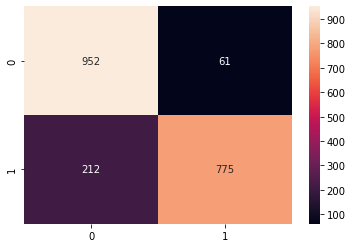

In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_cat)
sns.heatmap(confusion_matrix(y_test, y_test_cat), annot = True, fmt='0.0f')

In [237]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5988018	total: 10.5ms	remaining: 10.4s
1:	learn: 0.5410292	total: 22.5ms	remaining: 11.2s
2:	learn: 0.5024698	total: 34.8ms	remaining: 11.6s
3:	learn: 0.4746441	total: 47ms	remaining: 11.7s
4:	learn: 0.4561149	total: 59.6ms	remaining: 11.9s
5:	learn: 0.4420967	total: 71.6ms	remaining: 11.9s
6:	learn: 0.4322900	total: 83.6ms	remaining: 11.9s
7:	learn: 0.4265857	total: 93.6ms	remaining: 11.6s
8:	learn: 0.4215914	total: 106ms	remaining: 11.7s
9:	learn: 0.4141029	total: 118ms	remaining: 11.7s
10:	learn: 0.4126328	total: 126ms	remaining: 11.3s
11:	learn: 0.4081306	total: 138ms	remaining: 11.4s
12:	learn: 0.4071230	total: 148ms	remaining: 11.2s
13:	learn: 0.4029372	total: 160ms	remaining: 11.2s
14:	learn: 0.3981877	total: 172ms	remaining: 11.3s
15:	learn: 0.3950272	total: 187ms	remaining: 11.5s
16:	learn: 0.3920076	total: 202ms	remaining: 11.7s
17:	learn: 0.3893012	total: 217ms	remaining: 11.8s
18:	learn: 0.3861339	total: 231ms	remaining: 12s
19:	learn: 0.3854318	total: 244ms	rem

177:	learn: 0.3239966	total: 2.2s	remaining: 10.2s
178:	learn: 0.3239854	total: 2.21s	remaining: 10.1s
179:	learn: 0.3239207	total: 2.25s	remaining: 10.2s
180:	learn: 0.3238801	total: 2.26s	remaining: 10.2s
181:	learn: 0.3238600	total: 2.27s	remaining: 10.2s
182:	learn: 0.3237780	total: 2.28s	remaining: 10.2s
183:	learn: 0.3236826	total: 2.3s	remaining: 10.2s
184:	learn: 0.3235940	total: 2.31s	remaining: 10.2s
185:	learn: 0.3235696	total: 2.32s	remaining: 10.2s
186:	learn: 0.3234649	total: 2.33s	remaining: 10.2s
187:	learn: 0.3233835	total: 2.35s	remaining: 10.1s
188:	learn: 0.3232836	total: 2.36s	remaining: 10.1s
189:	learn: 0.3231936	total: 2.37s	remaining: 10.1s
190:	learn: 0.3231086	total: 2.38s	remaining: 10.1s
191:	learn: 0.3230863	total: 2.4s	remaining: 10.1s
192:	learn: 0.3230630	total: 2.41s	remaining: 10.1s
193:	learn: 0.3230418	total: 2.42s	remaining: 10.1s
194:	learn: 0.3229902	total: 2.44s	remaining: 10.1s
195:	learn: 0.3229179	total: 2.45s	remaining: 10s
196:	learn: 0.322

338:	learn: 0.3190615	total: 4.25s	remaining: 8.3s
339:	learn: 0.3190396	total: 4.27s	remaining: 8.28s
340:	learn: 0.3190214	total: 4.28s	remaining: 8.27s
341:	learn: 0.3190031	total: 4.29s	remaining: 8.26s
342:	learn: 0.3189746	total: 4.3s	remaining: 8.25s
343:	learn: 0.3189630	total: 4.32s	remaining: 8.23s
344:	learn: 0.3189396	total: 4.33s	remaining: 8.22s
345:	learn: 0.3189223	total: 4.34s	remaining: 8.21s
346:	learn: 0.3189111	total: 4.36s	remaining: 8.2s
347:	learn: 0.3189045	total: 4.37s	remaining: 8.19s
348:	learn: 0.3188741	total: 4.38s	remaining: 8.18s
349:	learn: 0.3188721	total: 4.39s	remaining: 8.16s
350:	learn: 0.3188625	total: 4.41s	remaining: 8.15s
351:	learn: 0.3188589	total: 4.42s	remaining: 8.14s
352:	learn: 0.3188532	total: 4.43s	remaining: 8.12s
353:	learn: 0.3188504	total: 4.44s	remaining: 8.11s
354:	learn: 0.3188255	total: 4.46s	remaining: 8.1s
355:	learn: 0.3188103	total: 4.47s	remaining: 8.09s
356:	learn: 0.3188035	total: 4.48s	remaining: 8.07s
357:	learn: 0.31

500:	learn: 0.3176605	total: 6.27s	remaining: 6.24s
501:	learn: 0.3176465	total: 6.28s	remaining: 6.23s
502:	learn: 0.3176349	total: 6.29s	remaining: 6.22s
503:	learn: 0.3176316	total: 6.31s	remaining: 6.21s
504:	learn: 0.3176273	total: 6.32s	remaining: 6.19s
505:	learn: 0.3176235	total: 6.33s	remaining: 6.18s
506:	learn: 0.3176199	total: 6.34s	remaining: 6.17s
507:	learn: 0.3176147	total: 6.36s	remaining: 6.16s
508:	learn: 0.3176137	total: 6.37s	remaining: 6.14s
509:	learn: 0.3176085	total: 6.38s	remaining: 6.13s
510:	learn: 0.3176090	total: 6.39s	remaining: 6.12s
511:	learn: 0.3176086	total: 6.4s	remaining: 6.1s
512:	learn: 0.3176026	total: 6.41s	remaining: 6.09s
513:	learn: 0.3175997	total: 6.43s	remaining: 6.08s
514:	learn: 0.3175975	total: 6.44s	remaining: 6.06s
515:	learn: 0.3175919	total: 6.45s	remaining: 6.05s
516:	learn: 0.3175889	total: 6.46s	remaining: 6.04s
517:	learn: 0.3175889	total: 6.47s	remaining: 6.02s
518:	learn: 0.3175785	total: 6.49s	remaining: 6.01s
519:	learn: 0.

667:	learn: 0.3171286	total: 8.25s	remaining: 4.1s
668:	learn: 0.3171289	total: 8.26s	remaining: 4.08s
669:	learn: 0.3171287	total: 8.27s	remaining: 4.07s
670:	learn: 0.3171287	total: 8.28s	remaining: 4.06s
671:	learn: 0.3171237	total: 8.29s	remaining: 4.04s
672:	learn: 0.3171169	total: 8.3s	remaining: 4.03s
673:	learn: 0.3171170	total: 8.31s	remaining: 4.02s
674:	learn: 0.3171149	total: 8.32s	remaining: 4.01s
675:	learn: 0.3171149	total: 8.33s	remaining: 3.99s
676:	learn: 0.3171149	total: 8.34s	remaining: 3.98s
677:	learn: 0.3171126	total: 8.36s	remaining: 3.97s
678:	learn: 0.3171126	total: 8.37s	remaining: 3.96s
679:	learn: 0.3171133	total: 8.38s	remaining: 3.94s
680:	learn: 0.3171124	total: 8.39s	remaining: 3.93s
681:	learn: 0.3171067	total: 8.4s	remaining: 3.92s
682:	learn: 0.3171061	total: 8.41s	remaining: 3.9s
683:	learn: 0.3171055	total: 8.42s	remaining: 3.89s
684:	learn: 0.3171052	total: 8.43s	remaining: 3.88s
685:	learn: 0.3171027	total: 8.44s	remaining: 3.87s
686:	learn: 0.31

829:	learn: 0.3169919	total: 9.99s	remaining: 2.05s
830:	learn: 0.3169922	total: 10s	remaining: 2.03s
831:	learn: 0.3169868	total: 10s	remaining: 2.02s
832:	learn: 0.3169866	total: 10s	remaining: 2.01s
833:	learn: 0.3169867	total: 10s	remaining: 2s
834:	learn: 0.3169867	total: 10s	remaining: 1.98s
835:	learn: 0.3169867	total: 10.1s	remaining: 1.97s
836:	learn: 0.3169867	total: 10.1s	remaining: 1.96s
837:	learn: 0.3169865	total: 10.1s	remaining: 1.95s
838:	learn: 0.3169866	total: 10.1s	remaining: 1.94s
839:	learn: 0.3169843	total: 10.1s	remaining: 1.92s
840:	learn: 0.3169839	total: 10.1s	remaining: 1.91s
841:	learn: 0.3169840	total: 10.1s	remaining: 1.9s
842:	learn: 0.3169841	total: 10.1s	remaining: 1.89s
843:	learn: 0.3169842	total: 10.1s	remaining: 1.87s
844:	learn: 0.3169841	total: 10.1s	remaining: 1.86s
845:	learn: 0.3169844	total: 10.2s	remaining: 1.85s
846:	learn: 0.3169837	total: 10.2s	remaining: 1.84s
847:	learn: 0.3169838	total: 10.2s	remaining: 1.82s
848:	learn: 0.3169843	tota

993:	learn: 0.3169568	total: 11.7s	remaining: 70.7ms
994:	learn: 0.3169567	total: 11.7s	remaining: 58.9ms
995:	learn: 0.3169567	total: 11.7s	remaining: 47.1ms
996:	learn: 0.3169570	total: 11.7s	remaining: 35.3ms
997:	learn: 0.3169571	total: 11.7s	remaining: 23.5ms
998:	learn: 0.3169568	total: 11.8s	remaining: 11.8ms
999:	learn: 0.3169563	total: 11.8s	remaining: 0us
0:	learn: 0.5353212	total: 9.53ms	remaining: 9.52s
1:	learn: 0.4741965	total: 21.9ms	remaining: 10.9s
2:	learn: 0.4407748	total: 35.3ms	remaining: 11.7s
3:	learn: 0.4240337	total: 48.6ms	remaining: 12.1s
4:	learn: 0.4124152	total: 61.3ms	remaining: 12.2s
5:	learn: 0.4031687	total: 73.5ms	remaining: 12.2s
6:	learn: 0.3960041	total: 86.2ms	remaining: 12.2s
7:	learn: 0.3885216	total: 98ms	remaining: 12.2s
8:	learn: 0.3846532	total: 111ms	remaining: 12.2s
9:	learn: 0.3791698	total: 123ms	remaining: 12.2s
10:	learn: 0.3754419	total: 135ms	remaining: 12.1s
11:	learn: 0.3746162	total: 146ms	remaining: 12s
12:	learn: 0.3718838	total

157:	learn: 0.3192162	total: 2s	remaining: 10.6s
158:	learn: 0.3191715	total: 2.01s	remaining: 10.6s
159:	learn: 0.3191218	total: 2.02s	remaining: 10.6s
160:	learn: 0.3190904	total: 2.03s	remaining: 10.6s
161:	learn: 0.3190618	total: 2.05s	remaining: 10.6s
162:	learn: 0.3190476	total: 2.06s	remaining: 10.6s
163:	learn: 0.3190386	total: 2.07s	remaining: 10.6s
164:	learn: 0.3190109	total: 2.08s	remaining: 10.5s
165:	learn: 0.3189534	total: 2.1s	remaining: 10.5s
166:	learn: 0.3189514	total: 2.11s	remaining: 10.5s
167:	learn: 0.3189378	total: 2.12s	remaining: 10.5s
168:	learn: 0.3189056	total: 2.13s	remaining: 10.5s
169:	learn: 0.3188879	total: 2.15s	remaining: 10.5s
170:	learn: 0.3188608	total: 2.16s	remaining: 10.5s
171:	learn: 0.3188559	total: 2.17s	remaining: 10.5s
172:	learn: 0.3188545	total: 2.18s	remaining: 10.4s
173:	learn: 0.3188232	total: 2.2s	remaining: 10.4s
174:	learn: 0.3188180	total: 2.21s	remaining: 10.4s
175:	learn: 0.3188036	total: 2.22s	remaining: 10.4s
176:	learn: 0.318

320:	learn: 0.3171100	total: 4s	remaining: 8.47s
321:	learn: 0.3171000	total: 4.02s	remaining: 8.46s
322:	learn: 0.3170993	total: 4.03s	remaining: 8.45s
323:	learn: 0.3170939	total: 4.04s	remaining: 8.43s
324:	learn: 0.3170928	total: 4.05s	remaining: 8.42s
325:	learn: 0.3170920	total: 4.06s	remaining: 8.4s
326:	learn: 0.3170916	total: 4.08s	remaining: 8.39s
327:	learn: 0.3170914	total: 4.08s	remaining: 8.37s
328:	learn: 0.3170855	total: 4.1s	remaining: 8.36s
329:	learn: 0.3170795	total: 4.11s	remaining: 8.35s
330:	learn: 0.3170759	total: 4.12s	remaining: 8.33s
331:	learn: 0.3170756	total: 4.13s	remaining: 8.32s
332:	learn: 0.3170756	total: 4.14s	remaining: 8.3s
333:	learn: 0.3170629	total: 4.16s	remaining: 8.29s
334:	learn: 0.3170629	total: 4.17s	remaining: 8.27s
335:	learn: 0.3170585	total: 4.18s	remaining: 8.26s
336:	learn: 0.3170578	total: 4.19s	remaining: 8.25s
337:	learn: 0.3170403	total: 4.2s	remaining: 8.23s
338:	learn: 0.3170376	total: 4.22s	remaining: 8.22s
339:	learn: 0.31703

495:	learn: 0.3167902	total: 5.93s	remaining: 6.02s
496:	learn: 0.3167907	total: 5.94s	remaining: 6.01s
497:	learn: 0.3167858	total: 5.95s	remaining: 6s
498:	learn: 0.3167827	total: 5.96s	remaining: 5.99s
499:	learn: 0.3167825	total: 5.97s	remaining: 5.97s
500:	learn: 0.3167827	total: 5.98s	remaining: 5.96s
501:	learn: 0.3167745	total: 5.99s	remaining: 5.95s
502:	learn: 0.3167696	total: 6.01s	remaining: 5.94s
503:	learn: 0.3167695	total: 6.02s	remaining: 5.92s
504:	learn: 0.3167696	total: 6.03s	remaining: 5.91s
505:	learn: 0.3167691	total: 6.04s	remaining: 5.9s
506:	learn: 0.3167694	total: 6.05s	remaining: 5.88s
507:	learn: 0.3167696	total: 6.06s	remaining: 5.87s
508:	learn: 0.3167692	total: 6.07s	remaining: 5.86s
509:	learn: 0.3167691	total: 6.08s	remaining: 5.84s
510:	learn: 0.3167692	total: 6.09s	remaining: 5.83s
511:	learn: 0.3167692	total: 6.1s	remaining: 5.81s
512:	learn: 0.3167696	total: 6.11s	remaining: 5.8s
513:	learn: 0.3167693	total: 6.12s	remaining: 5.79s
514:	learn: 0.3167

657:	learn: 0.3166854	total: 7.67s	remaining: 3.99s
658:	learn: 0.3166832	total: 7.68s	remaining: 3.98s
659:	learn: 0.3166827	total: 7.69s	remaining: 3.96s
660:	learn: 0.3166830	total: 7.7s	remaining: 3.95s
661:	learn: 0.3166808	total: 7.72s	remaining: 3.94s
662:	learn: 0.3166807	total: 7.73s	remaining: 3.93s
663:	learn: 0.3166808	total: 7.74s	remaining: 3.92s
664:	learn: 0.3166808	total: 7.75s	remaining: 3.9s
665:	learn: 0.3166810	total: 7.76s	remaining: 3.89s
666:	learn: 0.3166747	total: 7.77s	remaining: 3.88s
667:	learn: 0.3166747	total: 7.78s	remaining: 3.87s
668:	learn: 0.3166722	total: 7.79s	remaining: 3.85s
669:	learn: 0.3166724	total: 7.8s	remaining: 3.84s
670:	learn: 0.3166680	total: 7.82s	remaining: 3.83s
671:	learn: 0.3166680	total: 7.83s	remaining: 3.82s
672:	learn: 0.3166687	total: 7.84s	remaining: 3.81s
673:	learn: 0.3166647	total: 7.85s	remaining: 3.8s
674:	learn: 0.3166580	total: 7.86s	remaining: 3.79s
675:	learn: 0.3166567	total: 7.88s	remaining: 3.77s
676:	learn: 0.31

823:	learn: 0.3166119	total: 9.41s	remaining: 2.01s
824:	learn: 0.3166120	total: 9.42s	remaining: 2s
825:	learn: 0.3166121	total: 9.43s	remaining: 1.99s
826:	learn: 0.3166121	total: 9.44s	remaining: 1.98s
827:	learn: 0.3166120	total: 9.45s	remaining: 1.96s
828:	learn: 0.3166121	total: 9.46s	remaining: 1.95s
829:	learn: 0.3166121	total: 9.47s	remaining: 1.94s
830:	learn: 0.3166114	total: 9.48s	remaining: 1.93s
831:	learn: 0.3166115	total: 9.49s	remaining: 1.92s
832:	learn: 0.3166115	total: 9.5s	remaining: 1.9s
833:	learn: 0.3166115	total: 9.51s	remaining: 1.89s
834:	learn: 0.3166114	total: 9.52s	remaining: 1.88s
835:	learn: 0.3166116	total: 9.53s	remaining: 1.87s
836:	learn: 0.3166108	total: 9.54s	remaining: 1.86s
837:	learn: 0.3166108	total: 9.55s	remaining: 1.85s
838:	learn: 0.3166111	total: 9.56s	remaining: 1.83s
839:	learn: 0.3166111	total: 9.57s	remaining: 1.82s
840:	learn: 0.3166111	total: 9.58s	remaining: 1.81s
841:	learn: 0.3166109	total: 9.59s	remaining: 1.8s
842:	learn: 0.3166

992:	learn: 0.3166038	total: 11.1s	remaining: 78.5ms
993:	learn: 0.3166037	total: 11.1s	remaining: 67.3ms
994:	learn: 0.3166037	total: 11.2s	remaining: 56ms
995:	learn: 0.3166038	total: 11.2s	remaining: 44.8ms
996:	learn: 0.3166037	total: 11.2s	remaining: 33.6ms
997:	learn: 0.3166037	total: 11.2s	remaining: 22.4ms
998:	learn: 0.3166037	total: 11.2s	remaining: 11.2ms
999:	learn: 0.3166037	total: 11.2s	remaining: 0us
0:	learn: 0.4943062	total: 10.7ms	remaining: 10.7s
1:	learn: 0.4409802	total: 23.3ms	remaining: 11.6s
2:	learn: 0.4192753	total: 36.8ms	remaining: 12.2s
3:	learn: 0.4023958	total: 49.3ms	remaining: 12.3s
4:	learn: 0.3913266	total: 62ms	remaining: 12.3s
5:	learn: 0.3850840	total: 73.9ms	remaining: 12.2s
6:	learn: 0.3803772	total: 86.9ms	remaining: 12.3s
7:	learn: 0.3729710	total: 99.6ms	remaining: 12.4s
8:	learn: 0.3654711	total: 112ms	remaining: 12.4s
9:	learn: 0.3632877	total: 125ms	remaining: 12.4s
10:	learn: 0.3583414	total: 138ms	remaining: 12.4s
11:	learn: 0.3578908	tot

158:	learn: 0.3174264	total: 2.04s	remaining: 10.8s
159:	learn: 0.3174146	total: 2.05s	remaining: 10.8s
160:	learn: 0.3173929	total: 2.07s	remaining: 10.8s
161:	learn: 0.3173831	total: 2.08s	remaining: 10.8s
162:	learn: 0.3173755	total: 2.09s	remaining: 10.7s
163:	learn: 0.3173487	total: 2.11s	remaining: 10.7s
164:	learn: 0.3173310	total: 2.12s	remaining: 10.7s
165:	learn: 0.3173311	total: 2.13s	remaining: 10.7s
166:	learn: 0.3173198	total: 2.14s	remaining: 10.7s
167:	learn: 0.3172994	total: 2.15s	remaining: 10.7s
168:	learn: 0.3172993	total: 2.17s	remaining: 10.6s
169:	learn: 0.3172996	total: 2.17s	remaining: 10.6s
170:	learn: 0.3172805	total: 2.19s	remaining: 10.6s
171:	learn: 0.3172753	total: 2.2s	remaining: 10.6s
172:	learn: 0.3172657	total: 2.21s	remaining: 10.6s
173:	learn: 0.3172583	total: 2.23s	remaining: 10.6s
174:	learn: 0.3172578	total: 2.24s	remaining: 10.6s
175:	learn: 0.3172440	total: 2.25s	remaining: 10.5s
176:	learn: 0.3172220	total: 2.27s	remaining: 10.5s
177:	learn: 0

327:	learn: 0.3167781	total: 3.99s	remaining: 8.18s
328:	learn: 0.3167785	total: 4s	remaining: 8.16s
329:	learn: 0.3167787	total: 4.01s	remaining: 8.14s
330:	learn: 0.3167780	total: 4.02s	remaining: 8.13s
331:	learn: 0.3167777	total: 4.03s	remaining: 8.11s
332:	learn: 0.3167777	total: 4.04s	remaining: 8.1s
333:	learn: 0.3167777	total: 4.05s	remaining: 8.08s
334:	learn: 0.3167779	total: 4.06s	remaining: 8.06s
335:	learn: 0.3167779	total: 4.07s	remaining: 8.04s
336:	learn: 0.3167779	total: 4.08s	remaining: 8.03s
337:	learn: 0.3167715	total: 4.09s	remaining: 8.02s
338:	learn: 0.3167723	total: 4.11s	remaining: 8.01s
339:	learn: 0.3167721	total: 4.12s	remaining: 7.99s
340:	learn: 0.3167721	total: 4.13s	remaining: 7.98s
341:	learn: 0.3167720	total: 4.14s	remaining: 7.96s
342:	learn: 0.3167715	total: 4.15s	remaining: 7.95s
343:	learn: 0.3167712	total: 4.16s	remaining: 7.93s
344:	learn: 0.3167646	total: 4.17s	remaining: 7.92s
345:	learn: 0.3167650	total: 4.18s	remaining: 7.91s
346:	learn: 0.31

500:	learn: 0.3165999	total: 5.92s	remaining: 5.89s
501:	learn: 0.3166001	total: 5.92s	remaining: 5.88s
502:	learn: 0.3166001	total: 5.94s	remaining: 5.87s
503:	learn: 0.3165998	total: 5.95s	remaining: 5.85s
504:	learn: 0.3165994	total: 5.96s	remaining: 5.84s
505:	learn: 0.3165995	total: 5.99s	remaining: 5.84s
506:	learn: 0.3165997	total: 6s	remaining: 5.83s
507:	learn: 0.3165993	total: 6.01s	remaining: 5.82s
508:	learn: 0.3165985	total: 6.02s	remaining: 5.81s
509:	learn: 0.3165988	total: 6.03s	remaining: 5.79s
510:	learn: 0.3165968	total: 6.04s	remaining: 5.78s
511:	learn: 0.3165967	total: 6.05s	remaining: 5.77s
512:	learn: 0.3165972	total: 6.06s	remaining: 5.76s
513:	learn: 0.3165972	total: 6.08s	remaining: 5.74s
514:	learn: 0.3165949	total: 6.09s	remaining: 5.73s
515:	learn: 0.3165946	total: 6.1s	remaining: 5.72s
516:	learn: 0.3165949	total: 6.11s	remaining: 5.71s
517:	learn: 0.3165949	total: 6.12s	remaining: 5.69s
518:	learn: 0.3165944	total: 6.13s	remaining: 5.68s
519:	learn: 0.31

670:	learn: 0.3165588	total: 7.81s	remaining: 3.83s
671:	learn: 0.3165592	total: 7.82s	remaining: 3.82s
672:	learn: 0.3165590	total: 7.83s	remaining: 3.81s
673:	learn: 0.3165587	total: 7.84s	remaining: 3.79s
674:	learn: 0.3165588	total: 7.85s	remaining: 3.78s
675:	learn: 0.3165588	total: 7.86s	remaining: 3.77s
676:	learn: 0.3165588	total: 7.87s	remaining: 3.76s
677:	learn: 0.3165583	total: 7.88s	remaining: 3.74s
678:	learn: 0.3165578	total: 7.89s	remaining: 3.73s
679:	learn: 0.3165583	total: 7.91s	remaining: 3.72s
680:	learn: 0.3165577	total: 7.92s	remaining: 3.71s
681:	learn: 0.3165577	total: 7.93s	remaining: 3.69s
682:	learn: 0.3165576	total: 7.94s	remaining: 3.68s
683:	learn: 0.3165577	total: 7.95s	remaining: 3.67s
684:	learn: 0.3165580	total: 7.96s	remaining: 3.66s
685:	learn: 0.3165579	total: 7.97s	remaining: 3.65s
686:	learn: 0.3165577	total: 7.98s	remaining: 3.63s
687:	learn: 0.3165579	total: 7.99s	remaining: 3.62s
688:	learn: 0.3165582	total: 8s	remaining: 3.61s
689:	learn: 0.3

834:	learn: 0.3165080	total: 9.56s	remaining: 1.89s
835:	learn: 0.3165073	total: 9.57s	remaining: 1.88s
836:	learn: 0.3165071	total: 9.58s	remaining: 1.86s
837:	learn: 0.3165073	total: 9.59s	remaining: 1.85s
838:	learn: 0.3165074	total: 9.6s	remaining: 1.84s
839:	learn: 0.3165074	total: 9.61s	remaining: 1.83s
840:	learn: 0.3165070	total: 9.62s	remaining: 1.82s
841:	learn: 0.3165074	total: 9.63s	remaining: 1.81s
842:	learn: 0.3165074	total: 9.64s	remaining: 1.79s
843:	learn: 0.3165076	total: 9.65s	remaining: 1.78s
844:	learn: 0.3165079	total: 9.66s	remaining: 1.77s
845:	learn: 0.3165073	total: 9.67s	remaining: 1.76s
846:	learn: 0.3165073	total: 9.68s	remaining: 1.75s
847:	learn: 0.3165067	total: 9.69s	remaining: 1.74s
848:	learn: 0.3165059	total: 9.7s	remaining: 1.73s
849:	learn: 0.3165060	total: 9.71s	remaining: 1.71s
850:	learn: 0.3165060	total: 9.72s	remaining: 1.7s
851:	learn: 0.3165049	total: 9.74s	remaining: 1.69s
852:	learn: 0.3165046	total: 9.75s	remaining: 1.68s
853:	learn: 0.3

0:	learn: 0.4677004	total: 10.8ms	remaining: 10.7s
1:	learn: 0.4225485	total: 23.4ms	remaining: 11.7s
2:	learn: 0.4032138	total: 36ms	remaining: 12s
3:	learn: 0.3912876	total: 49.4ms	remaining: 12.3s
4:	learn: 0.3835768	total: 60.5ms	remaining: 12s
5:	learn: 0.3755076	total: 73ms	remaining: 12.1s
6:	learn: 0.3722959	total: 85.6ms	remaining: 12.1s
7:	learn: 0.3668274	total: 97.7ms	remaining: 12.1s
8:	learn: 0.3593516	total: 110ms	remaining: 12.2s
9:	learn: 0.3576802	total: 123ms	remaining: 12.1s
10:	learn: 0.3542923	total: 135ms	remaining: 12.1s
11:	learn: 0.3533189	total: 145ms	remaining: 11.9s
12:	learn: 0.3523093	total: 157ms	remaining: 11.9s
13:	learn: 0.3502341	total: 170ms	remaining: 11.9s
14:	learn: 0.3484158	total: 181ms	remaining: 11.9s
15:	learn: 0.3442179	total: 195ms	remaining: 12s
16:	learn: 0.3431469	total: 208ms	remaining: 12s
17:	learn: 0.3429656	total: 220ms	remaining: 12s
18:	learn: 0.3426653	total: 233ms	remaining: 12s
19:	learn: 0.3414745	total: 245ms	remaining: 12s


173:	learn: 0.3169217	total: 2.17s	remaining: 10.3s
174:	learn: 0.3169203	total: 2.18s	remaining: 10.3s
175:	learn: 0.3169175	total: 2.19s	remaining: 10.3s
176:	learn: 0.3169106	total: 2.21s	remaining: 10.3s
177:	learn: 0.3169098	total: 2.22s	remaining: 10.2s
178:	learn: 0.3169098	total: 2.23s	remaining: 10.2s
179:	learn: 0.3169102	total: 2.24s	remaining: 10.2s
180:	learn: 0.3168966	total: 2.25s	remaining: 10.2s
181:	learn: 0.3168700	total: 2.26s	remaining: 10.2s
182:	learn: 0.3168634	total: 2.27s	remaining: 10.2s
183:	learn: 0.3168572	total: 2.29s	remaining: 10.2s
184:	learn: 0.3168522	total: 2.3s	remaining: 10.1s
185:	learn: 0.3168518	total: 2.31s	remaining: 10.1s
186:	learn: 0.3168514	total: 2.32s	remaining: 10.1s
187:	learn: 0.3168436	total: 2.33s	remaining: 10.1s
188:	learn: 0.3168396	total: 2.35s	remaining: 10.1s
189:	learn: 0.3168391	total: 2.36s	remaining: 10.1s
190:	learn: 0.3168377	total: 2.37s	remaining: 10s
191:	learn: 0.3168209	total: 2.38s	remaining: 10s
192:	learn: 0.316

347:	learn: 0.3166312	total: 4.08s	remaining: 7.65s
348:	learn: 0.3166310	total: 4.09s	remaining: 7.64s
349:	learn: 0.3166310	total: 4.1s	remaining: 7.62s
350:	learn: 0.3166307	total: 4.11s	remaining: 7.61s
351:	learn: 0.3166307	total: 4.13s	remaining: 7.59s
352:	learn: 0.3166307	total: 4.13s	remaining: 7.58s
353:	learn: 0.3166296	total: 4.14s	remaining: 7.57s
354:	learn: 0.3166300	total: 4.16s	remaining: 7.55s
355:	learn: 0.3166301	total: 4.17s	remaining: 7.54s
356:	learn: 0.3166305	total: 4.17s	remaining: 7.52s
357:	learn: 0.3166305	total: 4.18s	remaining: 7.51s
358:	learn: 0.3166305	total: 4.2s	remaining: 7.49s
359:	learn: 0.3166306	total: 4.21s	remaining: 7.48s
360:	learn: 0.3166305	total: 4.22s	remaining: 7.46s
361:	learn: 0.3166301	total: 4.23s	remaining: 7.45s
362:	learn: 0.3166297	total: 4.24s	remaining: 7.43s
363:	learn: 0.3166296	total: 4.25s	remaining: 7.42s
364:	learn: 0.3166298	total: 4.26s	remaining: 7.41s
365:	learn: 0.3166296	total: 4.27s	remaining: 7.39s
366:	learn: 0.

511:	learn: 0.3165438	total: 5.77s	remaining: 5.5s
512:	learn: 0.3165437	total: 5.78s	remaining: 5.49s
513:	learn: 0.3165442	total: 5.79s	remaining: 5.48s
514:	learn: 0.3165441	total: 5.8s	remaining: 5.46s
515:	learn: 0.3165444	total: 5.81s	remaining: 5.45s
516:	learn: 0.3165445	total: 5.82s	remaining: 5.44s
517:	learn: 0.3165447	total: 5.83s	remaining: 5.43s
518:	learn: 0.3165446	total: 5.84s	remaining: 5.42s
519:	learn: 0.3165446	total: 5.85s	remaining: 5.4s
520:	learn: 0.3165444	total: 5.86s	remaining: 5.39s
521:	learn: 0.3165444	total: 5.87s	remaining: 5.38s
522:	learn: 0.3165443	total: 5.88s	remaining: 5.37s
523:	learn: 0.3165443	total: 5.89s	remaining: 5.35s
524:	learn: 0.3165443	total: 5.9s	remaining: 5.34s
525:	learn: 0.3165441	total: 5.92s	remaining: 5.33s
526:	learn: 0.3165447	total: 5.93s	remaining: 5.32s
527:	learn: 0.3165446	total: 5.94s	remaining: 5.31s
528:	learn: 0.3165439	total: 5.95s	remaining: 5.29s
529:	learn: 0.3165432	total: 5.96s	remaining: 5.29s
530:	learn: 0.31

678:	learn: 0.3165098	total: 7.5s	remaining: 3.55s
679:	learn: 0.3165098	total: 7.51s	remaining: 3.54s
680:	learn: 0.3165099	total: 7.52s	remaining: 3.52s
681:	learn: 0.3165096	total: 7.53s	remaining: 3.51s
682:	learn: 0.3165096	total: 7.54s	remaining: 3.5s
683:	learn: 0.3165096	total: 7.55s	remaining: 3.49s
684:	learn: 0.3165096	total: 7.56s	remaining: 3.48s
685:	learn: 0.3165096	total: 7.57s	remaining: 3.47s
686:	learn: 0.3165096	total: 7.58s	remaining: 3.46s
687:	learn: 0.3165101	total: 7.59s	remaining: 3.44s
688:	learn: 0.3165099	total: 7.6s	remaining: 3.43s
689:	learn: 0.3165099	total: 7.61s	remaining: 3.42s
690:	learn: 0.3165097	total: 7.62s	remaining: 3.41s
691:	learn: 0.3165097	total: 7.63s	remaining: 3.4s
692:	learn: 0.3165103	total: 7.65s	remaining: 3.39s
693:	learn: 0.3165100	total: 7.66s	remaining: 3.38s
694:	learn: 0.3165100	total: 7.67s	remaining: 3.36s
695:	learn: 0.3165100	total: 7.68s	remaining: 3.35s
696:	learn: 0.3165084	total: 7.69s	remaining: 3.34s
697:	learn: 0.31

844:	learn: 0.3165005	total: 9.17s	remaining: 1.68s
845:	learn: 0.3165006	total: 9.18s	remaining: 1.67s
846:	learn: 0.3165006	total: 9.19s	remaining: 1.66s
847:	learn: 0.3165006	total: 9.2s	remaining: 1.65s
848:	learn: 0.3165006	total: 9.2s	remaining: 1.64s
849:	learn: 0.3165006	total: 9.21s	remaining: 1.63s
850:	learn: 0.3165006	total: 9.22s	remaining: 1.61s
851:	learn: 0.3165012	total: 9.23s	remaining: 1.6s
852:	learn: 0.3164985	total: 9.25s	remaining: 1.59s
853:	learn: 0.3164955	total: 9.26s	remaining: 1.58s
854:	learn: 0.3164953	total: 9.27s	remaining: 1.57s
855:	learn: 0.3164954	total: 9.28s	remaining: 1.56s
856:	learn: 0.3164954	total: 9.29s	remaining: 1.55s
857:	learn: 0.3164954	total: 9.3s	remaining: 1.54s
858:	learn: 0.3164943	total: 9.31s	remaining: 1.53s
859:	learn: 0.3164944	total: 9.32s	remaining: 1.52s
860:	learn: 0.3164947	total: 9.33s	remaining: 1.5s
861:	learn: 0.3164947	total: 9.34s	remaining: 1.5s
862:	learn: 0.3164947	total: 9.35s	remaining: 1.48s
863:	learn: 0.3164

4:	learn: 0.3834494	total: 56.7ms	remaining: 11.3s
5:	learn: 0.3729976	total: 66.4ms	remaining: 11s
6:	learn: 0.3697013	total: 79.4ms	remaining: 11.3s
7:	learn: 0.3642404	total: 92.8ms	remaining: 11.5s
8:	learn: 0.3572692	total: 105ms	remaining: 11.5s
9:	learn: 0.3526633	total: 118ms	remaining: 11.6s
10:	learn: 0.3491921	total: 130ms	remaining: 11.6s
11:	learn: 0.3490056	total: 139ms	remaining: 11.5s
12:	learn: 0.3480797	total: 152ms	remaining: 11.5s
13:	learn: 0.3419398	total: 165ms	remaining: 11.6s
14:	learn: 0.3419348	total: 174ms	remaining: 11.4s
15:	learn: 0.3415053	total: 185ms	remaining: 11.4s
16:	learn: 0.3402344	total: 198ms	remaining: 11.4s
17:	learn: 0.3381455	total: 209ms	remaining: 11.4s
18:	learn: 0.3376529	total: 222ms	remaining: 11.4s
19:	learn: 0.3347527	total: 234ms	remaining: 11.5s
20:	learn: 0.3332532	total: 248ms	remaining: 11.5s
21:	learn: 0.3328712	total: 260ms	remaining: 11.6s
22:	learn: 0.3320315	total: 272ms	remaining: 11.6s
23:	learn: 0.3317267	total: 283ms	r

180:	learn: 0.3167379	total: 2.13s	remaining: 9.66s
181:	learn: 0.3167329	total: 2.15s	remaining: 9.65s
182:	learn: 0.3167325	total: 2.16s	remaining: 9.63s
183:	learn: 0.3167329	total: 2.17s	remaining: 9.61s
184:	learn: 0.3167328	total: 2.18s	remaining: 9.59s
185:	learn: 0.3167332	total: 2.19s	remaining: 9.57s
186:	learn: 0.3167332	total: 2.2s	remaining: 9.55s
187:	learn: 0.3167328	total: 2.21s	remaining: 9.53s
188:	learn: 0.3167279	total: 2.22s	remaining: 9.52s
189:	learn: 0.3167288	total: 2.23s	remaining: 9.5s
190:	learn: 0.3167272	total: 2.24s	remaining: 9.48s
191:	learn: 0.3167271	total: 2.25s	remaining: 9.46s
192:	learn: 0.3167271	total: 2.26s	remaining: 9.44s
193:	learn: 0.3167275	total: 2.27s	remaining: 9.42s
194:	learn: 0.3167246	total: 2.28s	remaining: 9.41s
195:	learn: 0.3167198	total: 2.29s	remaining: 9.4s
196:	learn: 0.3167198	total: 2.3s	remaining: 9.38s
197:	learn: 0.3167199	total: 2.31s	remaining: 9.37s
198:	learn: 0.3167192	total: 2.32s	remaining: 9.34s
199:	learn: 0.31

349:	learn: 0.3166265	total: 3.84s	remaining: 7.12s
350:	learn: 0.3166265	total: 3.85s	remaining: 7.11s
351:	learn: 0.3166269	total: 3.85s	remaining: 7.1s
352:	learn: 0.3166268	total: 3.86s	remaining: 7.08s
353:	learn: 0.3166270	total: 3.87s	remaining: 7.07s
354:	learn: 0.3166270	total: 3.88s	remaining: 7.06s
355:	learn: 0.3166269	total: 3.89s	remaining: 7.04s
356:	learn: 0.3166233	total: 3.9s	remaining: 7.03s
357:	learn: 0.3166242	total: 3.92s	remaining: 7.02s
358:	learn: 0.3166236	total: 3.93s	remaining: 7.01s
359:	learn: 0.3166236	total: 3.94s	remaining: 7s
360:	learn: 0.3166237	total: 3.94s	remaining: 6.98s
361:	learn: 0.3166237	total: 3.95s	remaining: 6.97s
362:	learn: 0.3166236	total: 3.96s	remaining: 6.96s
363:	learn: 0.3166237	total: 3.97s	remaining: 6.94s
364:	learn: 0.3166233	total: 3.98s	remaining: 6.93s
365:	learn: 0.3166238	total: 3.99s	remaining: 6.92s
366:	learn: 0.3166230	total: 4s	remaining: 6.91s
367:	learn: 0.3166230	total: 4.01s	remaining: 6.89s
368:	learn: 0.316623

518:	learn: 0.3166007	total: 5.5s	remaining: 5.1s
519:	learn: 0.3166005	total: 5.51s	remaining: 5.09s
520:	learn: 0.3166005	total: 5.52s	remaining: 5.08s
521:	learn: 0.3166008	total: 5.53s	remaining: 5.06s
522:	learn: 0.3166007	total: 5.54s	remaining: 5.05s
523:	learn: 0.3166006	total: 5.55s	remaining: 5.04s
524:	learn: 0.3166008	total: 5.56s	remaining: 5.03s
525:	learn: 0.3166006	total: 5.57s	remaining: 5.02s
526:	learn: 0.3166005	total: 5.58s	remaining: 5.01s
527:	learn: 0.3166009	total: 5.59s	remaining: 5s
528:	learn: 0.3166003	total: 5.6s	remaining: 4.99s
529:	learn: 0.3166002	total: 5.61s	remaining: 4.97s
530:	learn: 0.3165998	total: 5.62s	remaining: 4.96s
531:	learn: 0.3165998	total: 5.63s	remaining: 4.95s
532:	learn: 0.3165998	total: 5.64s	remaining: 4.94s
533:	learn: 0.3165998	total: 5.65s	remaining: 4.93s
534:	learn: 0.3166000	total: 5.66s	remaining: 4.92s
535:	learn: 0.3166001	total: 5.67s	remaining: 4.91s
536:	learn: 0.3166002	total: 5.68s	remaining: 4.89s
537:	learn: 0.3166

687:	learn: 0.3165923	total: 7.16s	remaining: 3.25s
688:	learn: 0.3165923	total: 7.17s	remaining: 3.24s
689:	learn: 0.3165923	total: 7.18s	remaining: 3.23s
690:	learn: 0.3165924	total: 7.19s	remaining: 3.22s
691:	learn: 0.3165925	total: 7.2s	remaining: 3.21s
692:	learn: 0.3165924	total: 7.21s	remaining: 3.19s
693:	learn: 0.3165914	total: 7.22s	remaining: 3.18s
694:	learn: 0.3165916	total: 7.23s	remaining: 3.17s
695:	learn: 0.3165913	total: 7.24s	remaining: 3.16s
696:	learn: 0.3165914	total: 7.25s	remaining: 3.15s
697:	learn: 0.3165915	total: 7.26s	remaining: 3.14s
698:	learn: 0.3165916	total: 7.27s	remaining: 3.13s
699:	learn: 0.3165912	total: 7.28s	remaining: 3.12s
700:	learn: 0.3165916	total: 7.29s	remaining: 3.11s
701:	learn: 0.3165914	total: 7.3s	remaining: 3.1s
702:	learn: 0.3165914	total: 7.31s	remaining: 3.09s
703:	learn: 0.3165915	total: 7.32s	remaining: 3.08s
704:	learn: 0.3165915	total: 7.33s	remaining: 3.07s
705:	learn: 0.3165915	total: 7.34s	remaining: 3.06s
706:	learn: 0.3

851:	learn: 0.3165862	total: 8.81s	remaining: 1.53s
852:	learn: 0.3165862	total: 8.83s	remaining: 1.52s
853:	learn: 0.3165861	total: 8.84s	remaining: 1.51s
854:	learn: 0.3165859	total: 8.85s	remaining: 1.5s
855:	learn: 0.3165858	total: 8.86s	remaining: 1.49s
856:	learn: 0.3165858	total: 8.87s	remaining: 1.48s
857:	learn: 0.3165861	total: 8.88s	remaining: 1.47s
858:	learn: 0.3165861	total: 8.89s	remaining: 1.46s
859:	learn: 0.3165857	total: 8.9s	remaining: 1.45s
860:	learn: 0.3165860	total: 8.91s	remaining: 1.44s
861:	learn: 0.3165860	total: 8.92s	remaining: 1.43s
862:	learn: 0.3165860	total: 8.93s	remaining: 1.42s
863:	learn: 0.3165859	total: 8.94s	remaining: 1.41s
864:	learn: 0.3165859	total: 8.95s	remaining: 1.4s
865:	learn: 0.3165859	total: 8.96s	remaining: 1.39s
866:	learn: 0.3165860	total: 8.96s	remaining: 1.38s
867:	learn: 0.3165863	total: 8.97s	remaining: 1.36s
868:	learn: 0.3165863	total: 8.98s	remaining: 1.35s
869:	learn: 0.3165864	total: 8.99s	remaining: 1.34s
870:	learn: 0.3

17:	learn: 0.3305887	total: 213ms	remaining: 11.6s
18:	learn: 0.3305829	total: 223ms	remaining: 11.5s
19:	learn: 0.3302621	total: 235ms	remaining: 11.5s
20:	learn: 0.3301006	total: 247ms	remaining: 11.5s
21:	learn: 0.3290543	total: 259ms	remaining: 11.5s
22:	learn: 0.3271374	total: 271ms	remaining: 11.5s
23:	learn: 0.3269236	total: 284ms	remaining: 11.5s
24:	learn: 0.3259722	total: 296ms	remaining: 11.5s
25:	learn: 0.3255247	total: 308ms	remaining: 11.5s
26:	learn: 0.3240327	total: 321ms	remaining: 11.6s
27:	learn: 0.3233215	total: 333ms	remaining: 11.6s
28:	learn: 0.3226848	total: 345ms	remaining: 11.6s
29:	learn: 0.3223524	total: 357ms	remaining: 11.6s
30:	learn: 0.3220255	total: 370ms	remaining: 11.6s
31:	learn: 0.3219052	total: 382ms	remaining: 11.6s
32:	learn: 0.3217796	total: 395ms	remaining: 11.6s
33:	learn: 0.3214598	total: 408ms	remaining: 11.6s
34:	learn: 0.3211688	total: 421ms	remaining: 11.6s
35:	learn: 0.3210468	total: 434ms	remaining: 11.6s
36:	learn: 0.3206415	total: 447

183:	learn: 0.3166146	total: 2.11s	remaining: 9.37s
184:	learn: 0.3166042	total: 2.13s	remaining: 9.36s
185:	learn: 0.3166042	total: 2.13s	remaining: 9.34s
186:	learn: 0.3166042	total: 2.14s	remaining: 9.32s
187:	learn: 0.3166042	total: 2.15s	remaining: 9.31s
188:	learn: 0.3166037	total: 2.16s	remaining: 9.29s
189:	learn: 0.3166037	total: 2.17s	remaining: 9.27s
190:	learn: 0.3166038	total: 2.18s	remaining: 9.25s
191:	learn: 0.3165882	total: 2.2s	remaining: 9.25s
192:	learn: 0.3165881	total: 2.21s	remaining: 9.23s
193:	learn: 0.3165881	total: 2.22s	remaining: 9.22s
194:	learn: 0.3165880	total: 2.23s	remaining: 9.2s
195:	learn: 0.3165880	total: 2.24s	remaining: 9.19s
196:	learn: 0.3165880	total: 2.25s	remaining: 9.17s
197:	learn: 0.3165849	total: 2.26s	remaining: 9.16s
198:	learn: 0.3165848	total: 2.27s	remaining: 9.14s
199:	learn: 0.3165849	total: 2.28s	remaining: 9.12s
200:	learn: 0.3165841	total: 2.29s	remaining: 9.11s
201:	learn: 0.3165844	total: 2.3s	remaining: 9.09s
202:	learn: 0.3

354:	learn: 0.3165138	total: 3.84s	remaining: 6.98s
355:	learn: 0.3165127	total: 3.85s	remaining: 6.96s
356:	learn: 0.3165125	total: 3.86s	remaining: 6.95s
357:	learn: 0.3165128	total: 3.87s	remaining: 6.94s
358:	learn: 0.3165126	total: 3.88s	remaining: 6.93s
359:	learn: 0.3165127	total: 3.89s	remaining: 6.91s
360:	learn: 0.3165128	total: 3.9s	remaining: 6.9s
361:	learn: 0.3165125	total: 3.91s	remaining: 6.89s
362:	learn: 0.3165128	total: 3.92s	remaining: 6.88s
363:	learn: 0.3165121	total: 3.93s	remaining: 6.87s
364:	learn: 0.3165124	total: 3.94s	remaining: 6.85s
365:	learn: 0.3165121	total: 3.95s	remaining: 6.84s
366:	learn: 0.3165121	total: 3.96s	remaining: 6.83s
367:	learn: 0.3165121	total: 3.97s	remaining: 6.81s
368:	learn: 0.3165121	total: 3.98s	remaining: 6.8s
369:	learn: 0.3165119	total: 3.99s	remaining: 6.79s
370:	learn: 0.3165131	total: 4s	remaining: 6.78s
371:	learn: 0.3165129	total: 4.01s	remaining: 6.76s
372:	learn: 0.3165131	total: 4.02s	remaining: 6.75s
373:	learn: 0.3165

524:	learn: 0.3164912	total: 5.55s	remaining: 5.02s
525:	learn: 0.3164913	total: 5.56s	remaining: 5.01s
526:	learn: 0.3164910	total: 5.57s	remaining: 5s
527:	learn: 0.3164911	total: 5.58s	remaining: 4.99s
528:	learn: 0.3164913	total: 5.59s	remaining: 4.97s
529:	learn: 0.3164914	total: 5.6s	remaining: 4.96s
530:	learn: 0.3164916	total: 5.61s	remaining: 4.95s
531:	learn: 0.3164913	total: 5.62s	remaining: 4.94s
532:	learn: 0.3164912	total: 5.63s	remaining: 4.93s
533:	learn: 0.3164915	total: 5.64s	remaining: 4.92s
534:	learn: 0.3164910	total: 5.64s	remaining: 4.91s
535:	learn: 0.3164915	total: 5.66s	remaining: 4.9s
536:	learn: 0.3164914	total: 5.67s	remaining: 4.88s
537:	learn: 0.3164914	total: 5.67s	remaining: 4.87s
538:	learn: 0.3164914	total: 5.68s	remaining: 4.86s
539:	learn: 0.3164913	total: 5.7s	remaining: 4.85s
540:	learn: 0.3164913	total: 5.71s	remaining: 4.84s
541:	learn: 0.3164911	total: 5.72s	remaining: 4.83s
542:	learn: 0.3164915	total: 5.73s	remaining: 4.82s
543:	learn: 0.3164

694:	learn: 0.3164611	total: 7.26s	remaining: 3.19s
695:	learn: 0.3164570	total: 7.28s	remaining: 3.18s
696:	learn: 0.3164573	total: 7.29s	remaining: 3.17s
697:	learn: 0.3164539	total: 7.3s	remaining: 3.16s
698:	learn: 0.3164539	total: 7.31s	remaining: 3.15s
699:	learn: 0.3164545	total: 7.32s	remaining: 3.14s
700:	learn: 0.3164542	total: 7.33s	remaining: 3.13s
701:	learn: 0.3164528	total: 7.34s	remaining: 3.12s
702:	learn: 0.3164532	total: 7.35s	remaining: 3.1s
703:	learn: 0.3164532	total: 7.36s	remaining: 3.09s
704:	learn: 0.3164532	total: 7.37s	remaining: 3.08s
705:	learn: 0.3164532	total: 7.38s	remaining: 3.07s
706:	learn: 0.3164533	total: 7.39s	remaining: 3.06s
707:	learn: 0.3164489	total: 7.4s	remaining: 3.05s
708:	learn: 0.3164490	total: 7.41s	remaining: 3.04s
709:	learn: 0.3164492	total: 7.42s	remaining: 3.03s
710:	learn: 0.3164492	total: 7.43s	remaining: 3.02s
711:	learn: 0.3164478	total: 7.45s	remaining: 3.01s
712:	learn: 0.3164490	total: 7.46s	remaining: 3s
713:	learn: 0.3164

856:	learn: 0.3164327	total: 8.95s	remaining: 1.49s
857:	learn: 0.3164307	total: 8.96s	remaining: 1.48s
858:	learn: 0.3164307	total: 8.97s	remaining: 1.47s
859:	learn: 0.3164308	total: 8.98s	remaining: 1.46s
860:	learn: 0.3164311	total: 8.99s	remaining: 1.45s
861:	learn: 0.3164312	total: 9s	remaining: 1.44s
862:	learn: 0.3164315	total: 9.01s	remaining: 1.43s
863:	learn: 0.3164311	total: 9.02s	remaining: 1.42s
864:	learn: 0.3164312	total: 9.03s	remaining: 1.41s
865:	learn: 0.3164316	total: 9.04s	remaining: 1.4s
866:	learn: 0.3164314	total: 9.05s	remaining: 1.39s
867:	learn: 0.3164313	total: 9.06s	remaining: 1.38s
868:	learn: 0.3164315	total: 9.07s	remaining: 1.37s
869:	learn: 0.3164290	total: 9.09s	remaining: 1.36s
870:	learn: 0.3164289	total: 9.1s	remaining: 1.35s
871:	learn: 0.3164290	total: 9.11s	remaining: 1.34s
872:	learn: 0.3164290	total: 9.12s	remaining: 1.33s
873:	learn: 0.3164289	total: 9.13s	remaining: 1.31s
874:	learn: 0.3164292	total: 9.14s	remaining: 1.3s
875:	learn: 0.3164

16:	learn: 0.3309960	total: 204ms	remaining: 11.8s
17:	learn: 0.3299819	total: 217ms	remaining: 11.8s
18:	learn: 0.3296360	total: 240ms	remaining: 12.4s
19:	learn: 0.3273988	total: 254ms	remaining: 12.4s
20:	learn: 0.3262603	total: 270ms	remaining: 12.6s
21:	learn: 0.3256162	total: 285ms	remaining: 12.7s
22:	learn: 0.3249553	total: 297ms	remaining: 12.6s
23:	learn: 0.3233413	total: 310ms	remaining: 12.6s
24:	learn: 0.3223545	total: 323ms	remaining: 12.6s
25:	learn: 0.3218608	total: 336ms	remaining: 12.6s
26:	learn: 0.3216987	total: 347ms	remaining: 12.5s
27:	learn: 0.3211996	total: 360ms	remaining: 12.5s
28:	learn: 0.3210125	total: 373ms	remaining: 12.5s
29:	learn: 0.3209918	total: 385ms	remaining: 12.4s
30:	learn: 0.3207476	total: 398ms	remaining: 12.4s
31:	learn: 0.3201132	total: 411ms	remaining: 12.4s
32:	learn: 0.3199532	total: 424ms	remaining: 12.4s
33:	learn: 0.3196566	total: 435ms	remaining: 12.4s
34:	learn: 0.3194803	total: 447ms	remaining: 12.3s
35:	learn: 0.3192213	total: 460

178:	learn: 0.3165804	total: 2.11s	remaining: 9.67s
179:	learn: 0.3165802	total: 2.12s	remaining: 9.65s
180:	learn: 0.3165803	total: 2.13s	remaining: 9.63s
181:	learn: 0.3165794	total: 2.14s	remaining: 9.62s
182:	learn: 0.3165796	total: 2.15s	remaining: 9.6s
183:	learn: 0.3165797	total: 2.16s	remaining: 9.58s
184:	learn: 0.3165796	total: 2.17s	remaining: 9.56s
185:	learn: 0.3165795	total: 2.18s	remaining: 9.54s
186:	learn: 0.3165788	total: 2.19s	remaining: 9.52s
187:	learn: 0.3165789	total: 2.2s	remaining: 9.51s
188:	learn: 0.3165793	total: 2.21s	remaining: 9.49s
189:	learn: 0.3165788	total: 2.22s	remaining: 9.47s
190:	learn: 0.3165786	total: 2.23s	remaining: 9.46s
191:	learn: 0.3165786	total: 2.24s	remaining: 9.44s
192:	learn: 0.3165699	total: 2.25s	remaining: 9.43s
193:	learn: 0.3165670	total: 2.27s	remaining: 9.42s
194:	learn: 0.3165668	total: 2.28s	remaining: 9.4s
195:	learn: 0.3165668	total: 2.29s	remaining: 9.38s
196:	learn: 0.3165668	total: 2.3s	remaining: 9.37s
197:	learn: 0.31

342:	learn: 0.3165059	total: 3.81s	remaining: 7.31s
343:	learn: 0.3165061	total: 3.82s	remaining: 7.29s
344:	learn: 0.3165062	total: 3.83s	remaining: 7.28s
345:	learn: 0.3165054	total: 3.84s	remaining: 7.26s
346:	learn: 0.3165054	total: 3.85s	remaining: 7.25s
347:	learn: 0.3165059	total: 3.87s	remaining: 7.24s
348:	learn: 0.3165060	total: 3.88s	remaining: 7.23s
349:	learn: 0.3165050	total: 3.88s	remaining: 7.22s
350:	learn: 0.3165053	total: 3.9s	remaining: 7.2s
351:	learn: 0.3165051	total: 3.91s	remaining: 7.19s
352:	learn: 0.3165052	total: 3.92s	remaining: 7.18s
353:	learn: 0.3165053	total: 3.92s	remaining: 7.16s
354:	learn: 0.3165055	total: 3.94s	remaining: 7.15s
355:	learn: 0.3165054	total: 3.95s	remaining: 7.14s
356:	learn: 0.3165052	total: 3.96s	remaining: 7.13s
357:	learn: 0.3165053	total: 3.97s	remaining: 7.11s
358:	learn: 0.3165051	total: 3.98s	remaining: 7.1s
359:	learn: 0.3165052	total: 3.99s	remaining: 7.09s
360:	learn: 0.3165052	total: 4s	remaining: 7.07s
361:	learn: 0.3165

505:	learn: 0.3164621	total: 5.5s	remaining: 5.37s
506:	learn: 0.3164621	total: 5.51s	remaining: 5.35s
507:	learn: 0.3164621	total: 5.52s	remaining: 5.34s
508:	learn: 0.3164621	total: 5.53s	remaining: 5.33s
509:	learn: 0.3164621	total: 5.54s	remaining: 5.32s
510:	learn: 0.3164621	total: 5.55s	remaining: 5.31s
511:	learn: 0.3164621	total: 5.56s	remaining: 5.3s
512:	learn: 0.3164621	total: 5.57s	remaining: 5.28s
513:	learn: 0.3164621	total: 5.58s	remaining: 5.27s
514:	learn: 0.3164621	total: 5.59s	remaining: 5.26s
515:	learn: 0.3164621	total: 5.59s	remaining: 5.25s
516:	learn: 0.3164621	total: 5.61s	remaining: 5.24s
517:	learn: 0.3164621	total: 5.61s	remaining: 5.22s
518:	learn: 0.3164621	total: 5.63s	remaining: 5.21s
519:	learn: 0.3164621	total: 5.63s	remaining: 5.2s
520:	learn: 0.3164621	total: 5.64s	remaining: 5.19s
521:	learn: 0.3164621	total: 5.66s	remaining: 5.18s
522:	learn: 0.3164621	total: 5.67s	remaining: 5.17s
523:	learn: 0.3164621	total: 5.67s	remaining: 5.16s
524:	learn: 0.3

669:	learn: 0.3164209	total: 7.2s	remaining: 3.55s
670:	learn: 0.3164208	total: 7.21s	remaining: 3.54s
671:	learn: 0.3164210	total: 7.22s	remaining: 3.52s
672:	learn: 0.3164211	total: 7.23s	remaining: 3.51s
673:	learn: 0.3164211	total: 7.24s	remaining: 3.5s
674:	learn: 0.3164207	total: 7.25s	remaining: 3.49s
675:	learn: 0.3164210	total: 7.26s	remaining: 3.48s
676:	learn: 0.3164207	total: 7.27s	remaining: 3.47s
677:	learn: 0.3164208	total: 7.28s	remaining: 3.46s
678:	learn: 0.3164208	total: 7.29s	remaining: 3.45s
679:	learn: 0.3164205	total: 7.3s	remaining: 3.44s
680:	learn: 0.3164198	total: 7.32s	remaining: 3.43s
681:	learn: 0.3164198	total: 7.33s	remaining: 3.42s
682:	learn: 0.3164197	total: 7.34s	remaining: 3.4s
683:	learn: 0.3164198	total: 7.35s	remaining: 3.39s
684:	learn: 0.3164207	total: 7.36s	remaining: 3.38s
685:	learn: 0.3164206	total: 7.37s	remaining: 3.37s
686:	learn: 0.3164206	total: 7.38s	remaining: 3.36s
687:	learn: 0.3164203	total: 7.38s	remaining: 3.35s
688:	learn: 0.31

829:	learn: 0.3163990	total: 8.92s	remaining: 1.83s
830:	learn: 0.3163994	total: 8.93s	remaining: 1.82s
831:	learn: 0.3163997	total: 8.94s	remaining: 1.8s
832:	learn: 0.3163993	total: 8.95s	remaining: 1.79s
833:	learn: 0.3163994	total: 8.96s	remaining: 1.78s
834:	learn: 0.3163992	total: 8.97s	remaining: 1.77s
835:	learn: 0.3163993	total: 8.98s	remaining: 1.76s
836:	learn: 0.3163995	total: 8.99s	remaining: 1.75s
837:	learn: 0.3163989	total: 9s	remaining: 1.74s
838:	learn: 0.3163989	total: 9.01s	remaining: 1.73s
839:	learn: 0.3163988	total: 9.02s	remaining: 1.72s
840:	learn: 0.3163992	total: 9.03s	remaining: 1.71s
841:	learn: 0.3163991	total: 9.04s	remaining: 1.7s
842:	learn: 0.3163992	total: 9.05s	remaining: 1.69s
843:	learn: 0.3163984	total: 9.06s	remaining: 1.68s
844:	learn: 0.3163984	total: 9.07s	remaining: 1.66s
845:	learn: 0.3163984	total: 9.08s	remaining: 1.65s
846:	learn: 0.3163984	total: 9.09s	remaining: 1.64s
847:	learn: 0.3163894	total: 9.11s	remaining: 1.63s
848:	learn: 0.316

0:	learn: 0.4243503	total: 10.5ms	remaining: 10.5s
1:	learn: 0.3977111	total: 23.1ms	remaining: 11.5s
2:	learn: 0.3810231	total: 35.5ms	remaining: 11.8s
3:	learn: 0.3707345	total: 47.8ms	remaining: 11.9s
4:	learn: 0.3677432	total: 58.2ms	remaining: 11.6s
5:	learn: 0.3671172	total: 66.2ms	remaining: 11s
6:	learn: 0.3577042	total: 78.8ms	remaining: 11.2s
7:	learn: 0.3531150	total: 90.2ms	remaining: 11.2s
8:	learn: 0.3476535	total: 103ms	remaining: 11.3s
9:	learn: 0.3445509	total: 114ms	remaining: 11.2s
10:	learn: 0.3441259	total: 124ms	remaining: 11.1s
11:	learn: 0.3361670	total: 137ms	remaining: 11.3s
12:	learn: 0.3338088	total: 150ms	remaining: 11.4s
13:	learn: 0.3304230	total: 162ms	remaining: 11.4s
14:	learn: 0.3289381	total: 175ms	remaining: 11.5s
15:	learn: 0.3282992	total: 188ms	remaining: 11.5s
16:	learn: 0.3268426	total: 200ms	remaining: 11.6s
17:	learn: 0.3251974	total: 214ms	remaining: 11.7s
18:	learn: 0.3249596	total: 227ms	remaining: 11.7s
19:	learn: 0.3238871	total: 240ms	r

166:	learn: 0.3164802	total: 1.99s	remaining: 9.91s
167:	learn: 0.3164812	total: 2s	remaining: 9.89s
168:	learn: 0.3164747	total: 2.01s	remaining: 9.89s
169:	learn: 0.3164732	total: 2.02s	remaining: 9.88s
170:	learn: 0.3164728	total: 2.03s	remaining: 9.86s
171:	learn: 0.3164731	total: 2.04s	remaining: 9.83s
172:	learn: 0.3164728	total: 2.05s	remaining: 9.81s
173:	learn: 0.3164728	total: 2.06s	remaining: 9.79s
174:	learn: 0.3164728	total: 2.07s	remaining: 9.77s
175:	learn: 0.3164733	total: 2.08s	remaining: 9.76s
176:	learn: 0.3164736	total: 2.09s	remaining: 9.74s
177:	learn: 0.3164718	total: 2.1s	remaining: 9.72s
178:	learn: 0.3164617	total: 2.12s	remaining: 9.72s
179:	learn: 0.3164597	total: 2.13s	remaining: 9.71s
180:	learn: 0.3164594	total: 2.14s	remaining: 9.69s
181:	learn: 0.3164594	total: 2.15s	remaining: 9.67s
182:	learn: 0.3164594	total: 2.16s	remaining: 9.65s
183:	learn: 0.3164590	total: 2.17s	remaining: 9.63s
184:	learn: 0.3164591	total: 2.18s	remaining: 9.61s
185:	learn: 0.31

340:	learn: 0.3164128	total: 3.92s	remaining: 7.58s
341:	learn: 0.3164134	total: 3.94s	remaining: 7.57s
342:	learn: 0.3164134	total: 3.94s	remaining: 7.56s
343:	learn: 0.3164133	total: 3.95s	remaining: 7.54s
344:	learn: 0.3164135	total: 3.96s	remaining: 7.53s
345:	learn: 0.3164132	total: 3.98s	remaining: 7.51s
346:	learn: 0.3164131	total: 3.99s	remaining: 7.5s
347:	learn: 0.3164134	total: 4s	remaining: 7.49s
348:	learn: 0.3164132	total: 4.01s	remaining: 7.48s
349:	learn: 0.3164126	total: 4.02s	remaining: 7.46s
350:	learn: 0.3164131	total: 4.03s	remaining: 7.45s
351:	learn: 0.3164134	total: 4.04s	remaining: 7.44s
352:	learn: 0.3164130	total: 4.05s	remaining: 7.42s
353:	learn: 0.3164102	total: 4.06s	remaining: 7.41s
354:	learn: 0.3164104	total: 4.07s	remaining: 7.4s
355:	learn: 0.3164105	total: 4.08s	remaining: 7.39s
356:	learn: 0.3164106	total: 4.09s	remaining: 7.37s
357:	learn: 0.3164104	total: 4.1s	remaining: 7.36s
358:	learn: 0.3164103	total: 4.11s	remaining: 7.34s
359:	learn: 0.3164

506:	learn: 0.3164009	total: 5.64s	remaining: 5.48s
507:	learn: 0.3164007	total: 5.65s	remaining: 5.47s
508:	learn: 0.3164004	total: 5.66s	remaining: 5.46s
509:	learn: 0.3164004	total: 5.67s	remaining: 5.45s
510:	learn: 0.3164005	total: 5.68s	remaining: 5.43s
511:	learn: 0.3164001	total: 5.69s	remaining: 5.42s
512:	learn: 0.3164004	total: 5.7s	remaining: 5.41s
513:	learn: 0.3164005	total: 5.71s	remaining: 5.4s
514:	learn: 0.3164006	total: 5.72s	remaining: 5.39s
515:	learn: 0.3164006	total: 5.73s	remaining: 5.37s
516:	learn: 0.3164006	total: 5.74s	remaining: 5.36s
517:	learn: 0.3164006	total: 5.75s	remaining: 5.35s
518:	learn: 0.3164005	total: 5.76s	remaining: 5.34s
519:	learn: 0.3164007	total: 5.77s	remaining: 5.32s
520:	learn: 0.3164011	total: 5.78s	remaining: 5.31s
521:	learn: 0.3164007	total: 5.79s	remaining: 5.3s
522:	learn: 0.3164004	total: 5.8s	remaining: 5.29s
523:	learn: 0.3164002	total: 5.81s	remaining: 5.28s
524:	learn: 0.3164004	total: 5.82s	remaining: 5.26s
525:	learn: 0.31

671:	learn: 0.3163477	total: 7.39s	remaining: 3.61s
672:	learn: 0.3163469	total: 7.41s	remaining: 3.6s
673:	learn: 0.3163470	total: 7.42s	remaining: 3.59s
674:	learn: 0.3163464	total: 7.42s	remaining: 3.58s
675:	learn: 0.3163463	total: 7.43s	remaining: 3.56s
676:	learn: 0.3163468	total: 7.45s	remaining: 3.55s
677:	learn: 0.3163457	total: 7.46s	remaining: 3.54s
678:	learn: 0.3163452	total: 7.47s	remaining: 3.53s
679:	learn: 0.3163453	total: 7.48s	remaining: 3.52s
680:	learn: 0.3163448	total: 7.49s	remaining: 3.51s
681:	learn: 0.3163446	total: 7.5s	remaining: 3.5s
682:	learn: 0.3163451	total: 7.51s	remaining: 3.49s
683:	learn: 0.3163450	total: 7.53s	remaining: 3.48s
684:	learn: 0.3163442	total: 7.54s	remaining: 3.46s
685:	learn: 0.3163443	total: 7.55s	remaining: 3.45s
686:	learn: 0.3163445	total: 7.56s	remaining: 3.44s
687:	learn: 0.3163444	total: 7.57s	remaining: 3.43s
688:	learn: 0.3163433	total: 7.58s	remaining: 3.42s
689:	learn: 0.3163439	total: 7.59s	remaining: 3.41s
690:	learn: 0.3

834:	learn: 0.3163302	total: 9.11s	remaining: 1.8s
835:	learn: 0.3163302	total: 9.12s	remaining: 1.79s
836:	learn: 0.3163306	total: 9.13s	remaining: 1.78s
837:	learn: 0.3163303	total: 9.14s	remaining: 1.77s
838:	learn: 0.3163306	total: 9.15s	remaining: 1.76s
839:	learn: 0.3163308	total: 9.16s	remaining: 1.75s
840:	learn: 0.3163300	total: 9.17s	remaining: 1.73s
841:	learn: 0.3163300	total: 9.18s	remaining: 1.72s
842:	learn: 0.3163303	total: 9.2s	remaining: 1.71s
843:	learn: 0.3163303	total: 9.21s	remaining: 1.7s
844:	learn: 0.3163304	total: 9.22s	remaining: 1.69s
845:	learn: 0.3163302	total: 9.23s	remaining: 1.68s
846:	learn: 0.3163302	total: 9.24s	remaining: 1.67s
847:	learn: 0.3163307	total: 9.25s	remaining: 1.66s
848:	learn: 0.3163312	total: 9.26s	remaining: 1.65s
849:	learn: 0.3163307	total: 9.27s	remaining: 1.64s
850:	learn: 0.3163305	total: 9.28s	remaining: 1.62s
851:	learn: 0.3163314	total: 9.29s	remaining: 1.61s
852:	learn: 0.3163303	total: 9.3s	remaining: 1.6s
853:	learn: 0.316

998:	learn: 0.3163140	total: 10.8s	remaining: 10.9ms
999:	learn: 0.3163140	total: 10.9s	remaining: 0us
0:	learn: 0.4213284	total: 9.55ms	remaining: 9.54s
1:	learn: 0.3956391	total: 22ms	remaining: 11s
2:	learn: 0.3792601	total: 34.5ms	remaining: 11.5s
3:	learn: 0.3603487	total: 47.6ms	remaining: 11.8s
4:	learn: 0.3578575	total: 58.5ms	remaining: 11.6s
5:	learn: 0.3500031	total: 70.3ms	remaining: 11.7s
6:	learn: 0.3404141	total: 83.8ms	remaining: 11.9s
7:	learn: 0.3391169	total: 95.3ms	remaining: 11.8s
8:	learn: 0.3383387	total: 107ms	remaining: 11.8s
9:	learn: 0.3381202	total: 117ms	remaining: 11.6s
10:	learn: 0.3333496	total: 130ms	remaining: 11.7s
11:	learn: 0.3315764	total: 142ms	remaining: 11.7s
12:	learn: 0.3297540	total: 155ms	remaining: 11.8s
13:	learn: 0.3284148	total: 168ms	remaining: 11.8s
14:	learn: 0.3256856	total: 180ms	remaining: 11.8s
15:	learn: 0.3237843	total: 192ms	remaining: 11.8s
16:	learn: 0.3233680	total: 206ms	remaining: 11.9s
17:	learn: 0.3226631	total: 219ms	re

161:	learn: 0.3165716	total: 1.88s	remaining: 9.7s
162:	learn: 0.3165716	total: 1.89s	remaining: 9.68s
163:	learn: 0.3165599	total: 1.9s	remaining: 9.67s
164:	learn: 0.3165265	total: 1.91s	remaining: 9.66s
165:	learn: 0.3165253	total: 1.92s	remaining: 9.65s
166:	learn: 0.3165255	total: 1.93s	remaining: 9.63s
167:	learn: 0.3165255	total: 1.94s	remaining: 9.61s
168:	learn: 0.3165109	total: 1.95s	remaining: 9.61s
169:	learn: 0.3165061	total: 1.97s	remaining: 9.6s
170:	learn: 0.3164983	total: 1.98s	remaining: 9.59s
171:	learn: 0.3164980	total: 1.99s	remaining: 9.58s
172:	learn: 0.3164982	total: 2s	remaining: 9.56s
173:	learn: 0.3164980	total: 2.01s	remaining: 9.54s
174:	learn: 0.3164982	total: 2.02s	remaining: 9.53s
175:	learn: 0.3164851	total: 2.03s	remaining: 9.52s
176:	learn: 0.3164763	total: 2.04s	remaining: 9.51s
177:	learn: 0.3164751	total: 2.06s	remaining: 9.5s
178:	learn: 0.3164753	total: 2.07s	remaining: 9.48s
179:	learn: 0.3164750	total: 2.08s	remaining: 9.46s
180:	learn: 0.31647

328:	learn: 0.3164126	total: 3.65s	remaining: 7.43s
329:	learn: 0.3164126	total: 3.65s	remaining: 7.42s
330:	learn: 0.3164122	total: 3.67s	remaining: 7.41s
331:	learn: 0.3164122	total: 3.68s	remaining: 7.4s
332:	learn: 0.3164130	total: 3.69s	remaining: 7.38s
333:	learn: 0.3164127	total: 3.7s	remaining: 7.37s
334:	learn: 0.3164128	total: 3.71s	remaining: 7.36s
335:	learn: 0.3164120	total: 3.72s	remaining: 7.35s
336:	learn: 0.3164118	total: 3.73s	remaining: 7.33s
337:	learn: 0.3164119	total: 3.74s	remaining: 7.32s
338:	learn: 0.3164124	total: 3.75s	remaining: 7.31s
339:	learn: 0.3164118	total: 3.76s	remaining: 7.3s
340:	learn: 0.3164120	total: 3.77s	remaining: 7.28s
341:	learn: 0.3164122	total: 3.78s	remaining: 7.27s
342:	learn: 0.3164115	total: 3.79s	remaining: 7.26s
343:	learn: 0.3164111	total: 3.8s	remaining: 7.25s
344:	learn: 0.3164113	total: 3.81s	remaining: 7.24s
345:	learn: 0.3164113	total: 3.82s	remaining: 7.22s
346:	learn: 0.3164113	total: 3.83s	remaining: 7.21s
347:	learn: 0.31

494:	learn: 0.3163668	total: 5.39s	remaining: 5.5s
495:	learn: 0.3163666	total: 5.4s	remaining: 5.49s
496:	learn: 0.3163658	total: 5.41s	remaining: 5.48s
497:	learn: 0.3163660	total: 5.42s	remaining: 5.47s
498:	learn: 0.3163660	total: 5.43s	remaining: 5.46s
499:	learn: 0.3163660	total: 5.44s	remaining: 5.44s
500:	learn: 0.3163656	total: 5.45s	remaining: 5.43s
501:	learn: 0.3163661	total: 5.46s	remaining: 5.42s
502:	learn: 0.3163658	total: 5.47s	remaining: 5.41s
503:	learn: 0.3163658	total: 5.49s	remaining: 5.4s
504:	learn: 0.3163659	total: 5.5s	remaining: 5.39s
505:	learn: 0.3163649	total: 5.51s	remaining: 5.38s
506:	learn: 0.3163643	total: 5.52s	remaining: 5.37s
507:	learn: 0.3163644	total: 5.53s	remaining: 5.36s
508:	learn: 0.3163647	total: 5.54s	remaining: 5.34s
509:	learn: 0.3163646	total: 5.55s	remaining: 5.33s
510:	learn: 0.3163641	total: 5.56s	remaining: 5.32s
511:	learn: 0.3163643	total: 5.57s	remaining: 5.31s
512:	learn: 0.3163646	total: 5.58s	remaining: 5.3s
513:	learn: 0.316

660:	learn: 0.3163433	total: 7.13s	remaining: 3.65s
661:	learn: 0.3163432	total: 7.14s	remaining: 3.64s
662:	learn: 0.3163424	total: 7.15s	remaining: 3.63s
663:	learn: 0.3163417	total: 7.16s	remaining: 3.62s
664:	learn: 0.3163416	total: 7.17s	remaining: 3.61s
665:	learn: 0.3163416	total: 7.18s	remaining: 3.6s
666:	learn: 0.3163417	total: 7.19s	remaining: 3.59s
667:	learn: 0.3163417	total: 7.2s	remaining: 3.58s
668:	learn: 0.3163417	total: 7.21s	remaining: 3.57s
669:	learn: 0.3163417	total: 7.22s	remaining: 3.56s
670:	learn: 0.3163417	total: 7.23s	remaining: 3.54s
671:	learn: 0.3163420	total: 7.24s	remaining: 3.53s
672:	learn: 0.3163421	total: 7.25s	remaining: 3.52s
673:	learn: 0.3163421	total: 7.26s	remaining: 3.51s
674:	learn: 0.3163419	total: 7.27s	remaining: 3.5s
675:	learn: 0.3163417	total: 7.28s	remaining: 3.49s
676:	learn: 0.3163416	total: 7.29s	remaining: 3.48s
677:	learn: 0.3163415	total: 7.3s	remaining: 3.47s
678:	learn: 0.3163414	total: 7.31s	remaining: 3.46s
679:	learn: 0.31

825:	learn: 0.3163373	total: 8.87s	remaining: 1.87s
826:	learn: 0.3163373	total: 8.88s	remaining: 1.86s
827:	learn: 0.3163370	total: 8.89s	remaining: 1.85s
828:	learn: 0.3163369	total: 8.9s	remaining: 1.83s
829:	learn: 0.3163365	total: 8.91s	remaining: 1.82s
830:	learn: 0.3163365	total: 8.92s	remaining: 1.81s
831:	learn: 0.3163321	total: 8.93s	remaining: 1.8s
832:	learn: 0.3163313	total: 8.94s	remaining: 1.79s
833:	learn: 0.3163319	total: 8.95s	remaining: 1.78s
834:	learn: 0.3163321	total: 8.96s	remaining: 1.77s
835:	learn: 0.3163320	total: 8.98s	remaining: 1.76s
836:	learn: 0.3163317	total: 8.99s	remaining: 1.75s
837:	learn: 0.3163315	total: 9s	remaining: 1.74s
838:	learn: 0.3163317	total: 9.01s	remaining: 1.73s
839:	learn: 0.3163318	total: 9.02s	remaining: 1.72s
840:	learn: 0.3163313	total: 9.03s	remaining: 1.71s
841:	learn: 0.3163312	total: 9.04s	remaining: 1.7s
842:	learn: 0.3163313	total: 9.05s	remaining: 1.69s
843:	learn: 0.3163309	total: 9.06s	remaining: 1.68s
844:	learn: 0.3163

987:	learn: 0.3163215	total: 10.6s	remaining: 129ms
988:	learn: 0.3163217	total: 10.6s	remaining: 118ms
989:	learn: 0.3163214	total: 10.6s	remaining: 107ms
990:	learn: 0.3163210	total: 10.6s	remaining: 96.5ms
991:	learn: 0.3163206	total: 10.6s	remaining: 85.8ms
992:	learn: 0.3163207	total: 10.7s	remaining: 75.1ms
993:	learn: 0.3163207	total: 10.7s	remaining: 64.4ms
994:	learn: 0.3163209	total: 10.7s	remaining: 53.6ms
995:	learn: 0.3163207	total: 10.7s	remaining: 42.9ms
996:	learn: 0.3163205	total: 10.7s	remaining: 32.2ms
997:	learn: 0.3163203	total: 10.7s	remaining: 21.4ms
998:	learn: 0.3163201	total: 10.7s	remaining: 10.7ms
999:	learn: 0.3163203	total: 10.7s	remaining: 0us


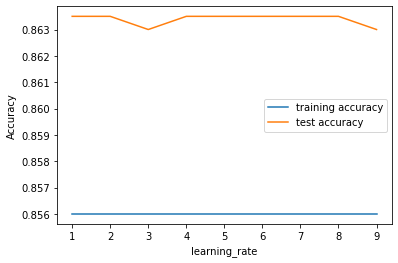

In [238]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [239]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [240]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [241]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [242]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.856
XGBoost Classifier : Accuracy on test Data: 0.863

XGBoost Classifier : f1_score on training Data: 0.843
XGBoost Classifier : f1_score on test Data: 0.849

XGBoost Classifier : Recall on training Data: 0.775
XGBoost Classifier : Recall on test Data: 0.775

XGBoost Classifier : precision on training Data: 0.925
XGBoost Classifier : precision on test Data: 0.925


In [243]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [244]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [245]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [246]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.842
Multi-layer Perceptron : Accuracy on test Data: 0.846

Multi-layer Perceptron : f1_score on training Data: 0.820
Multi-layer Perceptron : f1_score on test Data: 0.820

Multi-layer Perceptron : Recall on training Data: 0.717
Multi-layer Perceptron : Recall on test Data: 0.720

Multi-layer Perceptron : precision on training Data: 0.956
Multi-layer Perceptron : precision on test Data: 0.957


In [247]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [248]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
 dense_15 (Dense)            (None, 8)                 56        
                                                                 
 dense_16 (Dense)            (None, 10)                90        
                                                                 
 dense_17 (Dense)            (None, 10)                110 

In [249]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 4ms/step - loss: -5541454.5000 - accuracy: 0.8600

Autoencoder: Accuracy on training Data: 0.842
Autoencoder: Accuracy on test Data: 0.860


In [250]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [251]:
clf.score(X_train, y_train)

0.802625

In [252]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.814


In [253]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1013
           1       0.88      0.72      0.79       987

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



<AxesSubplot:>

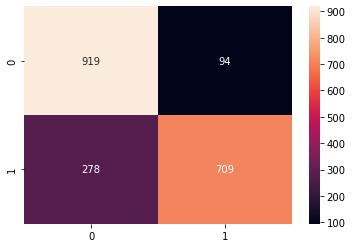

In [254]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [255]:
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators=100)
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = LogisticRegression(random_state=0)
# model_4 = BernoulliNB()
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1), ('KNN', model_2), ('LogisticRegression', model_3),
                                        ('DT', model_5)], voting='hard')

In [256]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [257]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.85075
Accuracy for test dataset for naive bayes reg :  0.8565


In [258]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [90]:
phising = ensemble.predict(input)

TypeError: float() argument must be a string or a number, not 'method'

In [180]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top 15 features
k_best = SelectKBest(score_func=chi2, k=15)
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Get the importance scores of the selected features
importance_scores = k_best.scores_[selected_indices]

# Combine features and scores into a list of tuples
feature_scores = list(zip(selected_features, importance_scores))

# Sort features based on scores in descending order
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the sorted features and their importance scores
print("Selected Features and Importance Scores (Descending Order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Selected Features and Importance Scores (Descending Order):
Prefix/Suffix: 830.9012875536481
URL_Length: 663.9198344970262
URL_Depth: 211.33802083333333
Have_At: 137.06194690265488
iFrame: 88.1067106710671
Have_IP: 55.0
TinyURL: 48.373200442967885
Domain_Age: 42.436789944404154
Mouse_Over: 24.6006006006006
Web_Traffic: 18.26285916991841
Web_Forwards: 15.317188983855651
Domain_End: 8.934559822200272
DNS_Record: 2.2857142857142856
https_Domain: 2.0
Redirection: 0.06666666666666667


In [181]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing k-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# Initializing RFECV with Random Forest as the estimator
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# Fitting RFECV on the training data
rfecv.fit(X_train_scaled, y_train)

# Creating a DataFrame to store feature selection results
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)

# Sorting the DataFrame based on feature ranking
df_features = df_features.sort_values(by='ranking')

# Filtering out features selected by RFECV
df_features = df_features[df_features['support']]

# Extracting the names of selected features
best_features = df_features['feature'].tolist()

# Selecting only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Get feature importances from the RandomForestClassifier
feature_importances = rfecv.estimator_.feature_importances_

# Combine features and importances into a list of tuples
feature_scores = list(zip(best_features, feature_importances))

# Sort features based on importance scores in descending order
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the selected features along with their importance scores in descending order
print("Selected Features and Importance Scores (Descending Order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Selected Features and Importance Scores (Descending Order):
URL_Length: 0.4269731665455031
URL_Depth: 0.24015183863527229
Prefix/Suffix: 0.11946798405127855
Have_At: 0.029351680514414794
Web_Traffic: 0.02872171429577404
iFrame: 0.02625051225765528
Domain_End: 0.0230407565213215
Web_Forwards: 0.02203720525607928
Domain_Age: 0.021672638897333563
TinyURL: 0.019142816192988688
DNS_Record: 0.017169528760995506
Mouse_Over: 0.009111031604978713
Redirection: 0.008882183494446033
Have_IP: 0.008026942971958566


In [182]:
best_features=['URL_Length','URL_Depth','Prefix/Suffix','Have_At','Web_Traffic','iFrame','Domain_End','Web_Forwards','Domain_Age','TinyURL']
# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 10), (8000,), (2000, 10), (2000,))

In [259]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [260]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.810,0.774,0.649,0.925
1,K-Nearest Neighbors,0.801,0.792,0.783,0.830
2,Support Vector Machine,0.837,0.809,0.685,0.956
3,Naive Bayes Classifier,0.802,0.750,0.586,0.981
4,Decision Tree,0.862,0.848,0.771,0.929
5,Random Forest,0.864,0.852,0.776,0.924
6,Gradient Boosting Classifier,0.863,0.850,0.775,0.926
7,CatBoost Classifier,0.864,0.850,0.773,0.928
8,XGBoost Classifier,0.862,0.849,0.775,0.925
9,Multi-layer Perceptron,0.846,0.822,0.717,0.956


In [261]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [262]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.864,0.852,0.776,0.924
1,CatBoost Classifier,0.864,0.850,0.773,0.928
2,Gradient Boosting Classifier,0.863,0.850,0.775,0.926
3,XGBoost Classifier,0.862,0.849,0.775,0.925
4,Decision Tree,0.862,0.848,0.771,0.929
5,Multi-layer Perceptron,0.846,0.822,0.717,0.956
6,Support Vector Machine,0.837,0.809,0.685,0.956
7,Logistic Regression,0.810,0.774,0.649,0.925
8,Naive Bayes Classifier,0.802,0.750,0.586,0.981
9,K-Nearest Neighbors,0.801,0.792,0.783,0.830


In [ ]:
# #  XGBoost Classifier Model
# from xgboost import XGBClassifier

# # instantiate the model
# gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# # fit the model 
# gbc.fit(X_train,y_train)

In [ ]:
import os
import pickle

if not os.path.exists('pickle'):
    os.makedirs('pickle')

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [ ]:
current_directory = os.getcwd()

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()